## Libraries


In [2]:
from google.colab import drive
drive.mount('/content/drive')
# note - update file names to your file directory when reading csv files.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip (22.0 MB)


In [81]:
# !pip install bed-reader
import pandas as pd
import numpy as np
from datetime import datetime
!pip install pandas_plink
from pandas_plink import read_plink1_bin
import xarray as xr
from pandas_profiling import ProfileReport
import statsmodels.api as sm
!pip install kmodes
from kmodes.kmodes import KModes
from sklearn.datasets import make_blobs
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns; sns.set()  # for plot styling
sns.set_style('whitegrid')
from datetime import datetime
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
!pip3 install xgboost
from xgboost import XGBClassifier
!pip3 install catboost
from catboost import CatBoostClassifier
!pip3 install lightgbm
import lightgbm as lgbm
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression #linear_model.LogisticRegression (setting multi_class=”multinomial”)
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import learning_curve

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
!pip install shap
import shap
import warnings
warnings.filterwarnings('ignore')

# https://scikit-learn.org/stable/modules/multiclass.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Genetic Dataset

In [ ]:
# from bed_reader import open_bed, sample_file
# bed = open_bed("/content/drive/MyDrive/Capstone COMP 549/Copy of TARC_MEGA_06012017_raw_Cauc_MEGA.bed")
bed = "/content/drive/MyDrive/Capstone COMP 549/Copy of TARC_MEGA_06012017_raw_Cauc_MEGA.bed"
fam = "/content/drive/MyDrive/Capstone COMP 549/Copy of TARC_MEGA_06012017_raw_Cauc_MEGA.fam"
bim = "/content/drive/MyDrive/Capstone COMP 549/Copy of TARC_MEGA_06012017_raw_Cauc_MEGA.bim"
# val = bed.read()

In [ ]:
G = read_plink1_bin(bed, bim, fam, verbose=False)

In [ ]:
G

In [ ]:
# type(G)
G.iid.to_series()

In [ ]:
G.shape


In [ ]:
G[0:10,:10]

In [ ]:
genetic_df = xr.DataArray.to_pandas(G[:,:1000])

In [ ]:
genetic_df

In [ ]:
genetic_df.shape

In [ ]:
xr.DataArray.to_dataframe(G[:,:1000])

fid         iid father mother gender trait chrom  \
sample     variant                                                             
1100130002 variant0    081586Sm  1100130002      0      0      2     1     0   
           variant1    081586Sm  1100130002      0      0      2     1     1   
           variant2    081586Sm  1100130002      0      0      2     1     1   
           variant3    081586Sm  1100130002      0      0      2     1     1   
           variant4    081586Sm  1100130002      0      0      2     1     1   
...                         ...         ...    ...    ...    ...   ...   ...   
8110045001 variant995  082944Sm  8110045001      0      0      2     2     1   
           variant996  082944Sm  8110045001      0      0      2     2     1   
           variant997  082944Sm  8110045001      0      0      2     2     1   
           variant998  082944Sm  8110045001      0      0      2     2     1   
           variant999  082944Sm  8110045001      0      0      2     2     1   

                                snp   cm      pos a0 a1  genotype  
sample     variant                                                 
1100130002 variant0             SNP  0.0        0  0  0       NaN  
           variant1     rs539322794  0.0    49554  G  A       2.0  
           variant2     rs200369601  0.0    92675  0  A       2.0  
           variant3    JHU_1.534237  0.0   534238  0  A       2.0  
           variant4     rs564134240  0.0   564672  0  A       2.0  
...                             ...  ...      ... .. ..       ...  
8110045001 variant995   rs148100543  0.0  1518393  G  A       2.0  
           variant996    rs80346239  0.0  1518869  C  G       2.0  
           variant997    rs28380252  0.0  1521371  G  A       2.0  
           variant998     rs6604983  0.0  1521595  C  T       1.0  
           variant999     rs4648786  0.0  1521805  G  A       2.0  

[1572000 rows x 13 columns]

In [ ]:
genomic_sample_1 = xr.DataArray.to_dataframe(G[0,:])

In [ ]:
genomic_sample_1

,sample,fid,iid,father,mother,gender,trait,chrom,snp,cm,pos,a0,a1,genotype
variant,,,,,,,,,,,,,,
variant0,1100130002,081586Sm,1100130002,0,0,2,1,0,SNP,0.0,0,0,0,NaN
variant1,1100130002,081586Sm,1100130002,0,0,2,1,1,rs539322794,0.0,49554,G,A,2.0
variant2,1100130002,081586Sm,1100130002,0,0,2,1,1,rs200369601,0.0,92675,0,A,2.0
variant3,1100130002,081586Sm,1100130002,0,0,2,1,1,JHU_1.534237,0.0,534238,0,A,2.0
variant4,1100130002,081586Sm,1100130002,0,0,2,1,1,rs564134240,0.0,564672,0,A,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
variant1736798,1100130002,081586Sm,1100130002,0,0,2,1,26,rs34301918,0.0,16391,A,G,2.0
variant1736799,1100130002,081586Sm,1100130002,0,0,2,1,26,rs139001869,0.0,16399,G,A,2.0
variant1736800,1100130002,081586Sm,1100130002,0,0,2,1,26,rs150751410,0.0,16429,0,C,2.0


In [ ]:
profile2 = ProfileReport(genomic_sample_1, title= 'Genomic_Sample_1_1100130002 Dataframe', html={'style':{'full_width':True}})
profile2.to_file(output_file = 'genomic_sample_1_1100130002_output.html')

## Non-genetic Dataset EDA/Preprocessing


In [5]:
non_genetic_df = pd.read_csv("/content/drive/MyDrive/Capstone COMP 549/Copy of 20220916 updated TARCC Data for Dr Broussard.csv")

Target Variable
1 = 1,319 AD patients
2 = 1,555 control
3 = other
4 = 792 MCI.



In [ ]:
non_genetic_df

,STUDYID,PATID,VISIT,MISC_TARC_PAT_VISIT,CCR,CCR_YES,CCR_CL_IMPRESS_CODE,CCR_MCIAMEM,CCR_MCIAPLUS,CCR_MCIAPLAN,...,P1_PTTYPEDESC,P1_SERUM,P1_SHARE_AGREE,P1_SHARE_DATEX,P1_TIMEDRAWX,P1_TIMEFOODX,P1_TIMESTICKX,P1_WHOLEBLOOD,P1_WHYNOTALL,P1_WHYNOTALLX
0,1119,11001119,1,1100111901,0,,,,,,...,AD,0,0,,,,,1,0,
1,1221,11001221,1,1100122101,0,,,,,,...,AD,1,0,,,,,1,0,
2,1221,11001221,2,1100122102,0,,,,,,...,AD,1,0,,16:50:00,,,1,0,
3,1221,11001221,3,1100122103,0,,,,,,...,AD,0,0,,,,,0,0,
4,1221,11001221,4,1100122104,0,,,,,,...,AD,0,0,,,,,0,0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14650,200231,81200231,1,8120023101,1,,4,,,,...,MCI,1,1,3/21/2017,9:24:00,19:00:00,,1,0,
14651,200232,81200232,1,8120023201,1,,4,,,,...,MCI,1,1,2/17/2017,13:59:59,12:00:00,,1,0,
14652,200233,81200233,1,8120023301,1,,4,,,,...,MCI,1,1,4/4/2017,9:08:59,7:30:00,,1,0,
14653,200234,81200234,1,8120023401,1,,4,,,,...,MCI,1,1,6/22/2017,9:13:59,7:00:00,,1,0,


In [ ]:
col_list = non_genetic_df.columns.to_list()

In [ ]:
non_genetic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14655 entries, 0 to 14654
Columns: 787 entries, STUDYID to P1_WHYNOTALLX
dtypes: float64(76), int64(359), object(352)
memory usage: 88.0+ MB


In [ ]:
# trial = non_genetic_df
# trial.select_dtypes('object')

,CCR_YES,CCR_CL_IMPRESS_CODE,CCR_MCIAMEM,CCR_MCIAPLUS,CCR_MCIAPLAN,CCR_MCIAPATT,CCR_MCIAPEX,CCR_MCIAPVIS,CCR_MCINON1,CCR_MCIN1LAN,...,P1_DATEFOODX,P1_DATESTICKX,P1_GDATEENROLLX,P1_PT_TYPE_OTHX,P1_PTTYPEDESC,P1_SHARE_DATEX,P1_TIMEDRAWX,P1_TIMEFOODX,P1_TIMESTICKX,P1_WHYNOTALLX
0,,,,,,,,,,,...,,,8/21/2007,,AD,,,,,
1,,,,,,,,,,,...,,,3/30/2007,,AD,,,,,
2,,,,,,,,,,,...,,,,,AD,,16:50:00,,,
3,,,,,,,,,,,...,,,,,AD,,,,,
4,,,,,,,,,,,...,,,,,AD,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14650,,4,,,,,,,,,...,3/20/2017,,,,MCI,3/21/2017,9:24:00,19:00:00,,
14651,,4,,,,,,,,,...,2/17/2017,,,,MCI,2/17/2017,13:59:59,12:00:00,,
14652,,4,,,,,,,,,...,4/4/2017,,,,MCI,4/4/2017,9:08:59,7:30:00,,
14653,,4,,,,,,,,,...,6/22/2017,,,,MCI,6/22/2017,9:13:59,7:00:00,,


Data Preprocessing

In [ ]:
no_nulls = non_genetic_df.replace(' ',np.nan,regex = True)
df_no_nulls = no_nulls.dropna(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  


In [ ]:
no_nulls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14655 entries, 0 to 14654
Columns: 787 entries, STUDYID to P1_WHYNOTALLX
dtypes: float64(76), int64(359), object(352)
memory usage: 88.0+ MB


In [ ]:
df_no_nulls.select_dtypes('object')

,A1_EVENTDATEX,C1_DATEX,P1_PTTYPEDESC
0,8/21/2007,7/6/2007,AD
1,3/30/2007,3/30/2007,AD
2,5/20/2008,5/6/2008,AD
3,9/30/2009,9/16/2009,AD
4,10/5/2010,9/23/2010,AD
...,...,...,...
14650,3/21/2017,3/21/2017,MCI
14651,2/17/2017,2/17/2017,MCI
14652,4/4/2017,4/4/2017,MCI
14653,6/22/2017,6/22/2017,MCI


In [ ]:
date_cols = ['A1_EVENTDATEX', 'C1_DATEX']
for date in date_cols:
  df_no_nulls[date] = pd.to_datetime(df_no_nulls[date], format='%m/%d/%Y') 
df_no_nulls.drop(columns=['P1_PTTYPEDESC'], inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
# target = df_no_nulls["P1_PT_TYPE"]

In [ ]:
features = df_no_nulls.drop(columns=["P1_PT_TYPE"])

In [ ]:
features

,STUDYID,PATID,VISIT,MISC_TARC_PAT_VISIT,CCR,MISC_SITEID,A1_BIRTHYR,AGE,A1_EVENTDATEX,A1_HANDEDNESS,...,I1_ISNEWINFORM,P1_BIOSERUM,P1_BUFFY,P1_CSF,P1_HRSAFTFOOT,P1_PLASMA,P1_SERUM,P1_SHARE_AGREE,P1_WHOLEBLOOD,P1_WHYNOTALL
0,1119,11001119,1,1100111901,0,11,1927,80,2007-08-21,2,...,0,0,0,0,0,0,0,0,1,0
1,1221,11001221,1,1100122101,0,11,1923,84,2007-03-30,2,...,0,1,0,0,0,0,1,0,1,0
2,1221,11001221,2,1100122102,0,11,1923,85,2008-05-20,2,...,0,0,1,0,3,1,1,0,1,0
3,1221,11001221,3,1100122103,0,11,1923,86,2009-09-30,2,...,0,0,0,0,0,0,0,0,0,0
4,1221,11001221,4,1100122104,0,11,1923,87,2010-10-05,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14650,200231,81200231,1,8120023101,1,81,1944,73,2017-03-21,2,...,1,0,1,0,0,1,1,1,1,0
14651,200232,81200232,1,8120023201,1,81,1945,72,2017-02-17,2,...,1,0,1,0,0,1,1,1,1,0
14652,200233,81200233,1,8120023301,1,81,1936,81,2017-04-04,2,...,1,0,1,0,0,1,1,1,1,0
14653,200234,81200234,1,8120023401,1,81,1954,63,2017-06-22,2,...,1,0,1,0,0,1,1,1,1,0


In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14655 entries, 0 to 14654
Columns: 436 entries, STUDYID to P1_WHYNOTALL
dtypes: datetime64[ns](2), float64(76), int64(358)
memory usage: 48.7 MB


In [ ]:
feature_lists = features.columns.to_list()

In [ ]:
pd.DataFrame(feature_lists)

Using df_no_nulls, 
[[153 61000131 1 ... 1 1 0]
 [158 51002220 1 ... 0 1 0]
 [73 51002308 1 ... 0 1 0]
 [32 61000032 1 ... 0 1 0]]

In [ ]:
#kmodes on all features including target
import numpy as np
from kmodes.kmodes import KModes

km = KModes(n_clusters=4, init='Huang', n_init=5, verbose=1)

clusters = km.fit_predict(df_no_nulls)

# Print the cluster centroids
print(km.cluster_centroids_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 7346, cost: 1521740.0
Run 1, iteration: 2/100, moves: 2134, cost: 1518623.0
Run 1, iteration: 3/100, moves: 775, cost: 1517709.0
Run 1, iteration: 4/100, moves: 204, cost: 1517704.0
Run 1, iteration: 5/100, moves: 0, cost: 1517704.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 7733, cost: 1537617.0
Run 2, iteration: 2/100, moves: 3909, cost: 1518385.0
Run 2, iteration: 3/100, moves: 980, cost: 1518011.0
Run 2, iteration: 4/100, moves: 185, cost: 1518008.0
Run 2, iteration: 5/100, moves: 2, cost: 1518008.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 3773, cost: 1503947.0
Run 3, iteration: 2/100, moves: 2695, cost: 1488348.0
Run 3, iteration: 3/100, moves: 765, cost: 1487709.0
Run 3, iteration: 4/100, moves: 328, cost: 1487494.0
Run 3, iteration

In [ ]:
profile1 = ProfileReport(df_no_nulls, title= 'Non-Genetic Dataset', html={'style':{'full_width':True}})
profile1.to_file(output_file = 'non_genetic_df_output.html')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

## Kmodes
### Initially started working on Survival Analysis, however, we changed directions.

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 1600518.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 1600518.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 1600518.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 1600518.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 1600518.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4284, cost: 1557259.0
Run 1, iteration: 2/100, moves: 1924, cost: 1549056.0
Run 1, iteration: 3/100, moves: 1090, cost: 1544707.0
Run 1, iteration: 4/100, moves: 163, cost: 1544701.0
Run 1, iteration: 5/100, mov

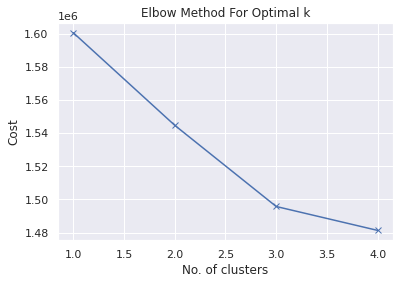

In [ ]:
#kmodes on all features including target

import numpy as np
from kmodes.kmodes import KModes

# Elbow curve to find optimal K
cost = []
K = range(1,5)
for num_clusters in list(K):

    kmode = KModes(n_clusters=num_clusters, init = "huang", n_init = 5, verbose=1)

    kmode.fit_predict(df_no_nulls)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

Optimal k (number of centroids) to use to represent the data is 3.

In [ ]:
# Print the cluster centroids   
print(kmode.cluster_centroids_)     

[[73 51002308 1 ... 1 1 0]
 [153 51002348 1 ... 0 1 0]
 [32 61000032 1 ... 0 1 0]
 [158 51002220 2 ... 0 1 0]]


In [ ]:
import numpy as np
from kmodes.kmodes import KModes

km = KModes(n_clusters=4, init='Huang', n_init=5, verbose=1)

clusters = km.fit_predict(df_no_nulls)
 
# Print the cluster centroids
print(km.cluster_centroids_) 

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5881, cost: 1526066.0
Run 1, iteration: 2/100, moves: 2604, cost: 1519221.0
Run 1, iteration: 3/100, moves: 1612, cost: 1517196.0
Run 1, iteration: 4/100, moves: 1048, cost: 1516274.0
Run 1, iteration: 5/100, moves: 242, cost: 1516204.0
Run 1, iteration: 6/100, moves: 5, cost: 1516204.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 6334, cost: 1540500.0
Run 2, iteration: 2/100, moves: 4624, cost: 1518757.0
Run 2, iteration: 3/100, moves: 730, cost: 1518676.0
Run 2, iteration: 4/100, moves: 14, cost: 1518676.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 6020, cost: 1537150.0
Run 3, iteration: 2/100, moves: 3227, cost: 1520868.0
Run 3, iteration: 3/100, moves: 1762, cost: 1518870.0
Run 3, iteration: 4/100, moves: 375, cost: 1518842.0
Run 3, itera

### Using only features on Kmodes


In [ ]:
!pip install kmodes
from kmodes.kmodes import KModes
from sklearn.datasets import make_blobs
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
features = pd.read_csv(r'/content/drive/MyDrive/Capstone COMP 549/features.csv')

In [ ]:
features

,STUDYID,PATID,VISIT,MISC_TARC_PAT_VISIT,CCR,MISC_SITEID,A1_BIRTHYR,AGE,A1_HANDEDNESS,A1_HISPANIC,...,I1_ISNEWINFORM,P1_BIOSERUM,P1_BUFFY,P1_CSF,P1_HRSAFTFOOT,P1_PLASMA,P1_SERUM,P1_SHARE_AGREE,P1_WHOLEBLOOD,P1_WHYNOTALL
0,1119,11001119,1,1100111901,0,11,1927,80,2,0,...,0,0,0,0,0,0,0,0,1,0
1,1221,11001221,1,1100122101,0,11,1923,84,2,0,...,0,1,0,0,0,0,1,0,1,0
2,1221,11001221,2,1100122102,0,11,1923,85,2,0,...,0,0,1,0,3,1,1,0,1,0
3,1221,11001221,3,1100122103,0,11,1923,86,2,0,...,0,0,0,0,0,0,0,0,0,0
4,1221,11001221,4,1100122104,0,11,1923,87,2,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14650,200231,81200231,1,8120023101,1,81,1944,73,2,1,...,1,0,1,0,0,1,1,1,1,0
14651,200232,81200232,1,8120023201,1,81,1945,72,2,1,...,1,0,1,0,0,1,1,1,1,0
14652,200233,81200233,1,8120023301,1,81,1936,81,2,1,...,1,0,1,0,0,1,1,1,1,0
14653,200234,81200234,1,8120023401,1,81,1954,63,2,1,...,1,0,1,0,0,1,1,1,1,0


In [ ]:
features = features.drop(['Unnamed: 0'], axis = 1)
features

,STUDYID,PATID,VISIT,MISC_TARC_PAT_VISIT,CCR,MISC_SITEID,A1_BIRTHYR,AGE,A1_HANDEDNESS,A1_HISPANIC,...,I1_ISNEWINFORM,P1_BIOSERUM,P1_BUFFY,P1_CSF,P1_HRSAFTFOOT,P1_PLASMA,P1_SERUM,P1_SHARE_AGREE,P1_WHOLEBLOOD,P1_WHYNOTALL
0,1119,11001119,1,1100111901,0,11,1927,80,2,0,...,0,0,0,0,0,0,0,0,1,0
1,1221,11001221,1,1100122101,0,11,1923,84,2,0,...,0,1,0,0,0,0,1,0,1,0
2,1221,11001221,2,1100122102,0,11,1923,85,2,0,...,0,0,1,0,3,1,1,0,1,0
3,1221,11001221,3,1100122103,0,11,1923,86,2,0,...,0,0,0,0,0,0,0,0,0,0
4,1221,11001221,4,1100122104,0,11,1923,87,2,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14650,200231,81200231,1,8120023101,1,81,1944,73,2,1,...,1,0,1,0,0,1,1,1,1,0
14651,200232,81200232,1,8120023201,1,81,1945,72,2,1,...,1,0,1,0,0,1,1,1,1,0
14652,200233,81200233,1,8120023301,1,81,1936,81,2,1,...,1,0,1,0,0,1,1,1,1,0
14653,200234,81200234,1,8120023401,1,81,1954,63,2,1,...,1,0,1,0,0,1,1,1,1,0


In [ ]:
# Run only when needed
# Kmodes on only features

# prior to removing datetime
# cost = []
# km = KModes(n_clusters=4, init='Huang', n_init=5, verbose=1)

# clusters = km.fit_predict(features)

# # Print the cluster centroids
# print(km.cluster_centroids_)


# import numpy as np
# from kmodes.kmodes import KModes

# Elbow curve to find optimal K
cost = []
K = range(1,5)
for num_clusters in list(K):

    kmode = KModes(n_clusters=num_clusters, init = "huang", n_init = 5, verbose=1)

    kmode.fit_predict(features)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

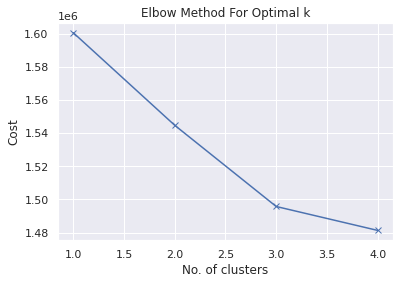

In [ ]:
km.cluster_centroids_.shape

(4, 436)

In [ ]:
# Only Features: now we can see our cluster centroids, the center of each of our clusters 
[[73 11004200 1 ... 1 1 0]
 [153 51002220 1 ... 0 1 0]
 [2308 51002308 1 ... 0 1 0]
 [32 61000032 2 ... 0 1 0]]

In [ ]:
features.iloc[73]

STUDYID                      1573
PATID                    11001573
VISIT                           6
MISC_TARC_PAT_VISIT    1100157306
CCR                             0
                          ...    
P1_PLASMA                       1
P1_SERUM                        1
P1_SHARE_AGREE                  1
P1_WHOLEBLOOD                   1
P1_WHYNOTALL                    0
Name: 73, Length: 436, dtype: object

In [ ]:
features.loc[features['PATID'] == 11004200]


,STUDYID,PATID,VISIT,MISC_TARC_PAT_VISIT,CCR,MISC_SITEID,A1_BIRTHYR,AGE,A1_EVENTDATEX,A1_HANDEDNESS,...,I1_ISNEWINFORM,P1_BIOSERUM,P1_BUFFY,P1_CSF,P1_HRSAFTFOOT,P1_PLASMA,P1_SERUM,P1_SHARE_AGREE,P1_WHOLEBLOOD,P1_WHYNOTALL
2153,4200,11004200,1,1100420001,0,11,1929,81,2010-09-22,2,...,1,0,1,0,3,1,1,0,1,0
2154,4200,11004200,2,1100420002,0,11,1929,82,2011-09-23,2,...,0,0,1,0,5,1,1,0,1,0
2155,4200,11004200,3,1100420003,0,11,1929,83,2012-09-26,2,...,0,0,1,0,4,1,1,0,1,0
2156,4200,11004200,4,1100420004,0,11,1929,84,2013-09-25,2,...,0,0,1,0,0,1,1,0,1,0
2157,4200,11004200,5,1100420005,0,11,1929,85,2014-09-12,2,...,0,0,1,0,0,1,1,1,1,0
2158,4200,11004200,6,1100420006,0,11,1929,86,2015-09-28,2,...,0,0,1,0,0,1,1,1,1,0
2159,4200,11004200,7,1100420007,1,11,1929,87,2016-09-23,2,...,0,0,1,0,0,1,1,1,1,0
2160,4200,11004200,8,1100420008,0,11,1929,88,2017-11-03,2,...,0,0,1,0,0,1,1,1,1,0


In [ ]:
features.loc[features['PATID'] == 51002220]


,STUDYID,PATID,VISIT,MISC_TARC_PAT_VISIT,CCR,MISC_SITEID,A1_BIRTHYR,AGE,A1_EVENTDATEX,A1_HANDEDNESS,...,I1_ISNEWINFORM,P1_BIOSERUM,P1_BUFFY,P1_CSF,P1_HRSAFTFOOT,P1_PLASMA,P1_SERUM,P1_SHARE_AGREE,P1_WHOLEBLOOD,P1_WHYNOTALL
5786,2220,51002220,1,5100222001,0,51,1937,70,2007-06-15,2,...,0,1,0,0,0,0,1,0,1,0
5787,2220,51002220,2,5100222002,0,51,1937,71,2008-07-03,2,...,0,0,1,0,1,1,1,0,1,0
5788,2220,51002220,3,5100222003,0,51,1937,72,2009-04-17,2,...,0,0,1,0,3,1,1,0,1,0
5789,2220,51002220,4,5100222004,0,51,1937,73,2010-03-04,2,...,0,0,1,0,2,1,1,0,1,0
5790,2220,51002220,5,5100222005,0,51,1937,73,2010-12-06,2,...,0,0,1,0,2,1,1,0,1,0
5791,2220,51002220,6,5100222006,0,51,1937,74,2011-09-12,2,...,0,0,1,0,3,1,1,0,1,0
5792,2220,51002220,7,5100222007,0,51,1937,75,2012-08-02,2,...,0,0,1,0,2,1,1,0,1,0
5793,2220,51002220,8,5100222008,0,51,1937,76,2013-06-10,2,...,0,0,1,0,0,1,1,0,1,0
5794,2220,51002220,9,5100222009,0,51,1937,77,2014-03-17,2,...,0,0,1,0,0,1,1,0,1,0
5795,2220,51002220,10,5100222010,0,51,1937,77,2014-12-22,2,...,0,0,1,0,0,1,1,0,1,0


In [ ]:
features.loc[features['PATID'] == 51002308]


,STUDYID,PATID,VISIT,MISC_TARC_PAT_VISIT,CCR,MISC_SITEID,A1_BIRTHYR,AGE,A1_EVENTDATEX,A1_HANDEDNESS,...,I1_ISNEWINFORM,P1_BIOSERUM,P1_BUFFY,P1_CSF,P1_HRSAFTFOOT,P1_PLASMA,P1_SERUM,P1_SHARE_AGREE,P1_WHOLEBLOOD,P1_WHYNOTALL
5922,2308,51002308,1,5100230801,0,51,1940,68,2008-05-30,2,...,0,0,1,0,1,1,1,0,1,0
5923,2308,51002308,2,5100230802,0,51,1940,69,2009-04-02,2,...,0,0,1,0,2,1,1,0,1,0
5924,2308,51002308,3,5100230803,0,51,1940,70,2010-01-08,2,...,0,0,1,0,2,1,1,0,1,0
5925,2308,51002308,4,5100230804,0,51,1940,70,2010-10-15,2,...,0,0,1,0,1,1,1,0,1,0
5926,2308,51002308,5,5100230805,0,51,1940,71,2011-08-08,2,...,0,0,1,0,3,1,1,0,1,0
5927,2308,51002308,6,5100230806,0,51,1940,72,2012-05-07,2,...,0,0,1,0,3,1,1,0,1,0
5928,2308,51002308,7,5100230807,0,51,1940,73,2013-02-25,2,...,0,0,1,0,0,1,1,0,1,0
5929,2308,51002308,8,5100230808,0,51,1940,73,2013-12-02,2,...,0,0,1,0,0,1,1,0,1,0
5930,2308,51002308,9,5100230809,0,51,1940,74,2014-09-29,2,...,0,0,1,0,0,1,1,0,1,0
5931,2308,51002308,10,5100230810,0,51,1940,75,2015-08-24,2,...,0,0,1,0,0,1,1,0,1,0


In [ ]:
features.loc[features['PATID'] == 61000032]


,STUDYID,PATID,VISIT,MISC_TARC_PAT_VISIT,CCR,MISC_SITEID,A1_BIRTHYR,AGE,A1_EVENTDATEX,A1_HANDEDNESS,...,I1_ISNEWINFORM,P1_BIOSERUM,P1_BUFFY,P1_CSF,P1_HRSAFTFOOT,P1_PLASMA,P1_SERUM,P1_SHARE_AGREE,P1_WHOLEBLOOD,P1_WHYNOTALL
9337,32,61000032,1,6100003201,0,61,1935,72,2007-04-04,2,...,0,1,0,0,0,0,1,0,1,0
9338,32,61000032,2,6100003202,0,61,1935,73,2008-03-17,2,...,0,0,1,0,16,1,1,0,1,0
9339,32,61000032,3,6100003203,0,61,1935,73,2008-12-12,2,...,0,0,1,0,14,1,1,0,1,0
9340,32,61000032,4,6100003204,0,61,1935,74,2009-12-17,2,...,0,0,1,0,21,1,1,0,1,0
9341,32,61000032,5,6100003205,0,61,1935,75,2010-11-18,2,...,0,0,1,0,3,1,1,0,1,0
9342,32,61000032,6,6100003206,0,61,1935,76,2011-10-14,2,...,0,0,1,0,15,1,1,0,1,0
9343,32,61000032,7,6100003207,0,61,1935,77,2012-10-19,2,...,0,0,1,0,14,1,1,0,1,0
9344,32,61000032,8,6100003208,0,61,1935,78,2013-08-27,2,...,0,0,1,0,0,1,1,0,1,0
9345,32,61000032,9,6100003209,0,61,1935,79,2014-08-28,2,...,0,0,1,0,0,1,1,1,1,0
9346,32,61000032,10,6100003210,0,61,1935,80,2015-08-25,2,...,0,0,1,0,0,1,1,1,1,0


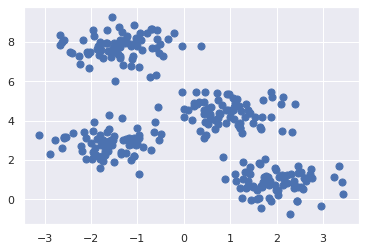

In [ ]:
from sklearn.datasets import make_blobs
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

features, target = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(features[:, 0], features[:, 1], s=50);

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(features)
y_kmeans = kmeans.predict(features)


In [ ]:
from sklearn.cluster import KModes

kmeans = KMeans(n_clusters=4)
kmeans.fit(features)
y_kmeans = kmeans.predict(features)


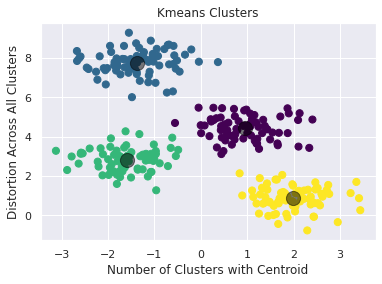

In [ ]:
plt.scatter(features[:, 0], features[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.title('Kmeans Clusters')
plt.xlabel('Number of Clusters with Centroid')
plt.ylabel('Distortion Across All Clusters')
plt.show()

# The X axis is the number of clusters with a centroid. The Y axis represents the distortion across all clusters. 
# The distortion is the sum of square errors (SSE) – determine the error, square it, then finally take the sum.
# The “error” in this case is the difference between each data point coordinates and the centroid coordinates.

In [ ]:
features

## More Preprocessing and Feature Selection

In [ ]:
target = df_no_nulls["P1_PT_TYPE"]
features = df_no_nulls.drop(columns=["P1_PT_TYPE"])

In [ ]:
date_cols = ['A1_EVENTDATEX', 'C1_DATEX']
for date in date_cols:
  features[date] = features[date].astype(str)
features.drop(columns=['A1_EVENTDATEX', 'C1_DATEX'], inplace=True)

In [ ]:
features

,STUDYID,PATID,VISIT,MISC_TARC_PAT_VISIT,CCR,MISC_SITEID,A1_BIRTHYR,AGE,A1_EVENTDATEX,A1_HANDEDNESS,...,I1_ISNEWINFORM,P1_BIOSERUM,P1_BUFFY,P1_CSF,P1_HRSAFTFOOT,P1_PLASMA,P1_SERUM,P1_SHARE_AGREE,P1_WHOLEBLOOD,P1_WHYNOTALL
0,1119,11001119,1,1100111901,0,11,1927,80,2007-08-21,2,...,0,0,0,0,0,0,0,0,1,0
1,1221,11001221,1,1100122101,0,11,1923,84,2007-03-30,2,...,0,1,0,0,0,0,1,0,1,0
2,1221,11001221,2,1100122102,0,11,1923,85,2008-05-20,2,...,0,0,1,0,3,1,1,0,1,0
3,1221,11001221,3,1100122103,0,11,1923,86,2009-09-30,2,...,0,0,0,0,0,0,0,0,0,0
4,1221,11001221,4,1100122104,0,11,1923,87,2010-10-05,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14650,200231,81200231,1,8120023101,1,81,1944,73,2017-03-21,2,...,1,0,1,0,0,1,1,1,1,0
14651,200232,81200232,1,8120023201,1,81,1945,72,2017-02-17,2,...,1,0,1,0,0,1,1,1,1,0
14652,200233,81200233,1,8120023301,1,81,1936,81,2017-04-04,2,...,1,0,1,0,0,1,1,1,1,0
14653,200234,81200234,1,8120023401,1,81,1954,63,2017-06-22,2,...,1,0,1,0,0,1,1,1,1,0


In [ ]:
features.isnull().sum()

STUDYID                0
PATID                  0
VISIT                  0
MISC_TARC_PAT_VISIT    0
CCR                    0
                      ..
P1_PTTYPEDESC          0
P1_SERUM               0
P1_SHARE_AGREE         0
P1_WHOLEBLOOD          0
P1_WHYNOTALL           0
Length: 435, dtype: int64

In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14655 entries, 0 to 14654
Columns: 435 entries, STUDYID to P1_WHYNOTALL
dtypes: float64(76), int64(358), object(1)
memory usage: 48.6+ MB


In [ ]:
features.describe()

,STUDYID,PATID,VISIT,MISC_TARC_PAT_VISIT,CCR,MISC_SITEID,A1_BIRTHYR,AGE,A1_HANDEDNESS,A1_HISPANIC,...,I1_ISNEWINFORM,P1_BIOSERUM,P1_BUFFY,P1_CSF,P1_HRSAFTFOOT,P1_PLASMA,P1_SERUM,P1_SHARE_AGREE,P1_WHOLEBLOOD,P1_WHYNOTALL
count,14655.000000,1.465500e+04,14655.000000,1.465500e+04,14655.000000,14655.000000,14655.000000,14655.000000,14655.00000,14655.000000,...,14655.000000,14655.000000,14655.000000,14655.000000,14655.000000,14655.000000,14655.000000,14655.000000,14655.000000,14655.000000
mean,44054.457864,4.647237e+07,3.380075,4.647237e+09,0.196588,46.428318,1940.408120,72.404640,1.95667,0.349778,...,0.238758,0.013920,0.886182,0.003275,1.736677,0.886114,0.903855,0.370590,0.923780,0.075333
std,85478.261933,2.438795e+07,2.275650,2.438795e+09,0.397432,24.370237,9.984402,9.334928,0.28129,0.502012,...,0.426339,0.117164,0.317601,0.057139,3.412827,0.317684,0.294800,0.482979,0.265358,0.384711
min,1.000000,1.100112e+07,1.000000,1.100112e+09,0.000000,11.000000,1905.000000,50.000000,1.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,470.000000,2.507005e+07,1.000000,2.507005e+09,0.000000,25.000000,1933.000000,65.000000,2.00000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
50%,2766.000000,5.100278e+07,3.000000,5.100278e+09,0.000000,51.000000,1940.000000,73.000000,2.00000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
75%,100039.000000,6.100037e+07,5.000000,6.100037e+09,0.000000,61.000000,1948.000000,79.000000,2.00000,1.000000,...,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,990137.000000,8.120024e+07,13.000000,8.120024e+09,1.000000,81.000000,1967.000000,105.000000,9.00000,9.000000,...,1.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
import statsmodels.api as sm
# Statsmodels.OLS requires us to add a constant.
y = target
# features = pd.get_dummies(features, columns=['team'], drop_first=True)
x = sm.add_constant(features)
model = sm.OLS(y,x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             P1_PT_TYPE   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     5028.
Date:                Wed, 12 Oct 2022   Prob (F-statistic):               0.00
Time:                        06:30:21   Log-Likelihood:                 14855.
No. Observations:               14655   AIC:                        -2.891e+04
Df Residuals:                   14257   BIC:                        -2.589e+04
Df Model:                         397                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [ ]:
OLSresult = (results.summary2().tables[1])


In [ ]:
OLSresult

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,3.010503e+00,2.071027e+00,1.453628,0.146072,-1.048981e+00,7.069987e+00
STUDYID,3.153436e-08,1.171578e-08,2.691614,0.007119,8.569903e-09,5.449883e-08
PATID,1.092020e-05,6.260628e-06,1.744266,0.081134,-1.351448e-06,2.319185e-05
VISIT,-1.319845e-03,6.234998e-04,-2.116833,0.034291,-2.541986e-03,-9.770417e-05
MISC_TARC_PAT_VISIT,-1.092037e-07,6.260631e-08,-1.744292,0.081130,-2.319202e-07,1.351285e-08
...,...,...,...,...,...,...
P1_PLASMA,-2.554499e-02,2.316012e-02,-1.102973,0.270057,-7.094183e-02,1.985186e-02
P1_SERUM,3.037765e-02,1.040858e-02,2.918519,0.003522,9.975466e-03,5.077983e-02
P1_SHARE_AGREE,2.602504e-03,2.971334e-03,0.875871,0.381115,-3.221699e-03,8.426707e-03
P1_WHOLEBLOOD,-4.282567e-04,9.276758e-03,-0.046164,0.963180,-1.861191e-02,1.775540e-02


In [ ]:
# OLSresult = OLSresult.transpose()

In [ ]:
OLSresult = pd.DataFrame(OLSresult['P>|t|'])


In [ ]:
OLSresult.columns = ['P_VAL']
OLSresult = OLSresult.transpose()

In [ ]:
OLSresult

,const,STUDYID,PATID,VISIT,MISC_TARC_PAT_VISIT,CCR,MISC_SITEID,A1_BIRTHYR,AGE,A1_HANDEDNESS,...,I1_ISNEWINFORM,P1_BIOSERUM,P1_BUFFY,P1_CSF,P1_HRSAFTFOOT,P1_PLASMA,P1_SERUM,P1_SHARE_AGREE,P1_WHOLEBLOOD,P1_WHYNOTALL
P_VAL,0.146072,0.007119,0.081134,0.034291,0.08113,0.147338,1.376552e-15,0.565916,0.570054,0.757931,...,0.549758,0.293628,0.959387,0.553784,0.240175,0.270057,0.003522,0.381115,0.96318,0.341661


In [ ]:
columns = OLSresult.columns.to_list()

for col in columns:
  if OLSresult[col]['P_VAL'] > 0.05:
    OLSresult = OLSresult.drop(col, axis=1)


In [ ]:
print(columns)

['const', 'STUDYID', 'PATID', 'VISIT', 'MISC_TARC_PAT_VISIT', 'CCR', 'MISC_SITEID', 'A1_BIRTHYR', 'AGE', 'A1_HANDEDNESS', 'A1_HISPANIC', 'A1_MARISTAT', 'A1_RESIDENC', 'A1_SEX', 'A3_DADDEM', 'A3_MOMDEM', 'A41_PMAP', 'A41_PMAPREV', 'A41_PMBF', 'A41_PMBFU', 'A41_PMBP', 'A41_PMBPF', 'A41_PMBPFU', 'A41_PMBPREV', 'A42_VEAPREV', 'A42_VEASU', 'A43_ADACONT', 'A43_ADAF', 'A43_ADAFU', 'A43_ADAPREV', 'A43_ADAS', 'A43_ADASU', 'A43_ADBCONT', 'A43_ADBENDDA', 'A43_ADBENDMO', 'A43_ADBENDYR', 'A43_ADBF', 'A43_ADBFU', 'A43_ADBPREV', 'A43_ADBS', 'A43_ADBSU', 'A43_ADCCONT', 'A43_ADCF', 'A43_ADCFU', 'A43_ADCPREV', 'A43_ADCS', 'A43_ADCSU', 'A43_ADDCONT', 'A43_ADDF', 'A43_ADDFU', 'A43_ADDPREV', 'A43_ADDS', 'A43_ADDSU', 'A43_ADECONT', 'A43_ADEF', 'A43_ADEFU', 'A43_ADEPREV', 'A43_ADES', 'A43_ADESU', 'A43_ADFCONT', 'A43_ADFF', 'A43_ADFFU', 'A43_ADFPREV', 'A43_ADFS', 'A43_ADFSU', 'A43_ADMEDEVER', 'A44_SSAF', 'A44_SSAFU', 'A44_SSAPREV', 'A44_SSAS', 'A44_SSBF', 'A44_SSBFU', 'A44_SSBPREV', 'A44_SSBS', 'A44_SSBSU', '

In [ ]:
OLSresult_list = OLSresult.columns.to_list()

In [ ]:
len(OLSresult_list)

78

In [ ]:
features

,STUDYID,PATID,VISIT,MISC_TARC_PAT_VISIT,CCR,MISC_SITEID,A1_BIRTHYR,AGE,A1_HANDEDNESS,A1_HISPANIC,...,I1_ISNEWINFORM,P1_BIOSERUM,P1_BUFFY,P1_CSF,P1_HRSAFTFOOT,P1_PLASMA,P1_SERUM,P1_SHARE_AGREE,P1_WHOLEBLOOD,P1_WHYNOTALL
0,1119,11001119,1,1100111901,0,11,1927,80,2,0,...,0,0,0,0,0,0,0,0,1,0
1,1221,11001221,1,1100122101,0,11,1923,84,2,0,...,0,1,0,0,0,0,1,0,1,0
2,1221,11001221,2,1100122102,0,11,1923,85,2,0,...,0,0,1,0,3,1,1,0,1,0
3,1221,11001221,3,1100122103,0,11,1923,86,2,0,...,0,0,0,0,0,0,0,0,0,0
4,1221,11001221,4,1100122104,0,11,1923,87,2,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14650,200231,81200231,1,8120023101,1,81,1944,73,2,1,...,1,0,1,0,0,1,1,1,1,0
14651,200232,81200232,1,8120023201,1,81,1945,72,2,1,...,1,0,1,0,0,1,1,1,1,0
14652,200233,81200233,1,8120023301,1,81,1936,81,2,1,...,1,0,1,0,0,1,1,1,1,0
14653,200234,81200234,1,8120023401,1,81,1954,63,2,1,...,1,0,1,0,0,1,1,1,1,0


In [ ]:
# features.to_csv(r'/content/drive/MyDrive/Capstone COMP 549/features.csv', index=True)

Feature selection determined by p-values


In [ ]:
unwanted_list = []
for col in features.columns:
  if col not in OLSresult_list:
    unwanted_list.append(col)
# feature selection determined by p-values
feat_bef_sel = features.drop(unwanted_list, axis=1)

In [ ]:
feat_bef_sel

,STUDYID,VISIT,MISC_SITEID,A1_RESIDENC,A3_DADDEM,A43_ADAF,A43_ADAPREV,A44_SSDS,A5_ALCOHOL,A5_DIABETES,...,PROTEO_NT_PROBNP,PROTEO_SICAM_1,PROTEO_SVCAM_1,PROTEO_TNF_B,X1_OBESE_IS,I1_INEDUC,I1_INHOWCONTACT,I1_INLIVWTH,I1_INVISITS,P1_SERUM
0,1119,1,11,1,0,0,0,0.0,0,0,...,0.00,0.00,0.00,0.0,0,0,0,0,0,0
1,1221,1,11,1,0,0,0,0.0,2,0,...,1047.17,572403.12,1113306.39,-999999.0,0,0,0,0,0,1
2,1221,2,11,1,0,2,0,0.0,2,0,...,1047.17,572403.12,1113306.39,-999999.0,0,16,1,1,0,1
3,1221,3,11,1,0,0,1,0.0,2,0,...,1047.17,572403.12,1113306.39,-999999.0,0,16,1,1,0,0
4,1221,4,11,1,0,0,1,0.0,2,0,...,1047.17,572403.12,1113306.39,-999999.0,0,16,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14650,200231,1,81,1,0,0,0,0.0,0,0,...,0.00,0.00,0.00,0.0,0,14,2,1,0,1
14651,200232,1,81,1,0,0,0,0.0,0,0,...,0.00,0.00,0.00,0.0,0,12,2,0,2,1
14652,200233,1,81,1,0,0,0,0.0,2,1,...,0.00,0.00,0.00,0.0,0,9,2,1,0,1
14653,200234,1,81,1,0,0,0,0.0,0,0,...,0.00,0.00,0.00,0.0,0,12,2,0,2,1


In [ ]:
feat_bef_sel.to_csv(r'/content/drive/MyDrive/Capstone COMP 549/feat_bef_sel.csv', index=True)

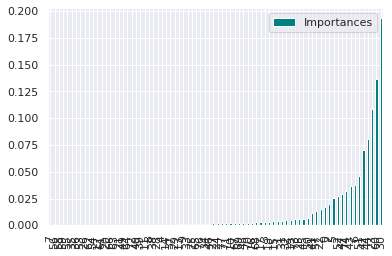

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=340)

model.fit(feat_bef_sel, target)

importances = model.feature_importances_

final_df = pd.DataFrame({"Features": pd.DataFrame(feat_bef_sel).columns, "Importances":importances})
final_df.set_index('Importances')

final_df = final_df.sort_values('Importances')

final_df.plot.bar(color = 'teal')

In [ ]:
count_zero = final_df['Importances'].value_counts() #(final_df['Importances'] == float(0)).sum()
count_zero

0.000007    1
0.002663    1
0.004438    1
0.004292    1
0.004033    1
           ..
0.000655    1
0.000611    1
0.000478    1
0.000478    1
0.189706    1
Name: Importances, Length: 78, dtype: int64

In [ ]:
final_df.nunique()

Features       78
Importances    78
dtype: int64

In [ ]:
final_df_rev_list = final_df.tail(30)['Features'].to_list()

In [ ]:
final_df_rev_list

['PROTEO_NT_PROBNP',
 'B1_BPDIAS',
 'B1_HRATE',
 'B5_DEPDSEV',
 'B1_WEIGHT',
 'VISIT',
 'D1_DEMUNIF',
 'B1_BMI',
 'D1_DEMUN',
 'D1_MCIAPVIS',
 'I1_INEDUC',
 'C1_SS_WAIS3_DIGTOT',
 'D1_MCIN2ATT',
 'D1_IMPNOMCI',
 'D1_POSSADIF',
 'C1_BOSTON60',
 'STUDYID',
 'MISC_SITEID',
 'A43_ADAF',
 'D1_MCINON2',
 'D1_MCIN1EX',
 'I1_INHOWCONTACT',
 'A43_ADAPREV',
 'D1_MCIAPEX',
 'D1_MCINON1',
 'D1_MCIAMEM',
 'D1_MCIAPLUS',
 'C1_CDRCA',
 'D1_PROBAD',
 'D1_DEMENTED']

Feature selection after using random forest classifier feature importances

In [ ]:
# feat_aft_sel = features.drop(final_df_rev_list)

unwanted_list = []
for col in features.columns:
  if col not in final_df_rev_list:
    unwanted_list.append(col)
feat_aft_sel = features.drop(unwanted_list, axis=1)

In [ ]:
feat_aft_sel

,STUDYID,VISIT,MISC_SITEID,A1_RESIDENC,A43_ADAF,A43_ADAPREV,B1_BMI,B1_HRATE,B1_WEIGHT,B5_DEPDSEV,...,D1_MCIAPVIS,D1_MCIN1EX,D1_MCIN2ATT,D1_MCINON1,D1_MCINON2,D1_POSSADIF,D1_PROBAD,PROTEO_NT_PROBNP,I1_INEDUC,I1_INHOWCONTACT
0,1119,1,11,1,0,0,27.7,80,182,0,...,0,0,0,0,0,0,1,0.00,0,0
1,1221,1,11,1,0,0,24.0,80,127,0,...,0,0,0,0,0,0,1,1047.17,0,0
2,1221,2,11,1,2,0,21.2,79,112,0,...,0,0,0,0,0,0,1,1047.17,16,1
3,1221,3,11,1,0,1,19.6,74,104,0,...,0,0,0,0,0,0,1,1047.17,16,1
4,1221,4,11,1,0,1,19.1,60,101,0,...,0,0,0,0,0,0,1,1047.17,16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14650,200231,1,81,1,0,0,32.3,67,164,0,...,0,0,0,0,0,0,0,0.00,14,2
14651,200232,1,81,1,0,0,25.9,60,146,0,...,0,0,0,0,0,0,0,0.00,12,2
14652,200233,1,81,1,0,0,32.2,61,177,1,...,0,1,0,1,0,0,0,0.00,9,2
14653,200234,1,81,1,0,0,30.6,60,158,0,...,0,0,0,0,1,0,0,0.00,12,2


Merged final features and target variables

In [ ]:
frames = [feat_aft_sel, target]

aft_sel_merged = pd.concat(frames, axis=1)

In [ ]:
aft_sel_merged

,STUDYID,VISIT,MISC_SITEID,A1_RESIDENC,A43_ADAF,A43_ADAPREV,B1_BMI,B1_HRATE,B1_WEIGHT,B5_DEPDSEV,...,D1_MCIN1EX,D1_MCIN2ATT,D1_MCINON1,D1_MCINON2,D1_POSSADIF,D1_PROBAD,PROTEO_NT_PROBNP,I1_INEDUC,I1_INHOWCONTACT,P1_PT_TYPE
0,1119,1,11,1,0,0,27.7,80,182,0,...,0,0,0,0,0,1,0.00,0,0,1
1,1221,1,11,1,0,0,24.0,80,127,0,...,0,0,0,0,0,1,1047.17,0,0,1
2,1221,2,11,1,2,0,21.2,79,112,0,...,0,0,0,0,0,1,1047.17,16,1,1
3,1221,3,11,1,0,1,19.6,74,104,0,...,0,0,0,0,0,1,1047.17,16,1,1
4,1221,4,11,1,0,1,19.1,60,101,0,...,0,0,0,0,0,1,1047.17,16,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14650,200231,1,81,1,0,0,32.3,67,164,0,...,0,0,0,0,0,0,0.00,14,2,4
14651,200232,1,81,1,0,0,25.9,60,146,0,...,0,0,0,0,0,0,0.00,12,2,4
14652,200233,1,81,1,0,0,32.2,61,177,1,...,1,0,1,0,0,0,0.00,9,2,4
14653,200234,1,81,1,0,0,30.6,60,158,0,...,0,0,0,1,0,0,0.00,12,2,4


In [ ]:
# aft_sel_merged.to_csv(r'/content/drive/MyDrive/Capstone COMP 549/ aft_sel_merged.csv', index=True)

In [ ]:
profile3 = ProfileReport(aft_sel_merged, title= 'Non-Genetic Dataset After Feature Selection', html={'style':{'full_width':True}})
profile3.to_file(output_file = 'non_genetic_df_output_feature_selection.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Top features that have high corr with target

In [ ]:
# top features that have high corr with target
['D1_DEMUN','A43_ADAPREV', 'C1_CDRCA', 'D1_DEMENTED', 'D1_IMPNOMCI', 'D1_MCIAMEM', 'D1_PROBAD', 'D1_MCINON1', 'D1_MCIN1EX', 'D1_MCIAPLUS', 'D1_MCIAPEX']


## Random Forest Feature Selection on total features with profiling

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=340)

model.fit(features, target)

importances = model.feature_importances_

final_df = pd.DataFrame({"Features": pd.DataFrame(features).columns, "Importances":importances})
final_df.set_index('Importances')

final_df = final_df.sort_values('Importances')

final_df.plot.bar(color = 'teal')

In [ ]:
count_zero = final_df['Importances'].value_counts() #(final_df['Importances'] == float(0)).sum()
count_zero

0.000000    36
0.000535     1
0.000529     1
0.000527     1
0.000521     1
            ..
0.000113     1
0.000113     1
0.000112     1
0.000106     1
0.101079     1
Name: Importances, Length: 399, dtype: int64

In [ ]:
final_df.tail(50)['Features'].to_list()

['MISC_SITEID',
 'F2_IADL5',
 'D1_MCINON2',
 'C1_TRAILB',
 'STUDYID',
 'D1_MCIAPLAN',
 'C1_SS_TRAILB',
 'F2_IADL6',
 'F1_PSMSTOTSCR',
 'C1_SS_WMS3_LM_I',
 'I1_INHOWCONTACT',
 'PATID',
 'MISC_TARC_PAT_VISIT',
 'C1_ANIMAL',
 'D1_IMPNOMCI',
 'F2_IADL4',
 'C1_SS_WMS3_VR_I',
 'X2_IDURY',
 'C1_SS_COMBINED_LM_I',
 'C1_CDRPER',
 'C1_SS_WMS3_LM_II',
 'F2_IADL1',
 'C1_SS_COMBINED_LM_II',
 'D1_MCIN1EX',
 'C1_SS_COMBINED_VR_I',
 'F2_IADL7',
 'F2_IADL3',
 'X2_PHYESTFIRM',
 'D1_MCIAPEX',
 'F2_IADL2',
 'X2_PHYEST',
 'C1_SS_WMS3_VR_II',
 'D1_MCINON1',
 'D1_MCIAMEM',
 'F2_IADL8',
 'F2_IADLTOTSCR',
 'C1_MMSE',
 'D1_MCIAPLUS',
 'C1_SS_COMBINED_VR_II',
 'C1_CDROR',
 'C1_CDRCA',
 'A43_ADMEDEVER',
 'C1_CDRHOB',
 'D1_PROBADIF',
 'C1_CDRJU',
 'D1_PROBAD',
 'C1_CDRMEM',
 'D1_DEMENTED',
 'C1_CDRGLOB',
 'C1_CDRSUM']

In [ ]:
features = features.iloc[36:, :]

In [ ]:
columns = ['MISC_SITEID',
 'F2_IADL5',
 'D1_MCINON2',
 'C1_TRAILB',
 'STUDYID',
 'D1_MCIAPLAN',
 'C1_SS_TRAILB',
 'F2_IADL6',
 'F1_PSMSTOTSCR',
 'C1_SS_WMS3_LM_I',
 'I1_INHOWCONTACT',
 'PATID',
 'MISC_TARC_PAT_VISIT',
 'C1_ANIMAL',
 'D1_IMPNOMCI',
 'F2_IADL4',
 'C1_SS_WMS3_VR_I',
 'X2_IDURY',
 'C1_SS_COMBINED_LM_I',
 'C1_CDRPER',
 'C1_SS_WMS3_LM_II',
 'F2_IADL1',
 'C1_SS_COMBINED_LM_II',
 'D1_MCIN1EX',
 'C1_SS_COMBINED_VR_I',
 'F2_IADL7',
 'F2_IADL3',
 'X2_PHYESTFIRM',
 'D1_MCIAPEX',
 'F2_IADL2',
 'X2_PHYEST',
 'C1_SS_WMS3_VR_II',
 'D1_MCINON1',
 'D1_MCIAMEM',
 'F2_IADL8',
 'F2_IADLTOTSCR',
 'C1_MMSE',
 'D1_MCIAPLUS',
 'C1_SS_COMBINED_VR_II',
 'C1_CDROR',
 'C1_CDRCA',
 'A43_ADMEDEVER',
 'C1_CDRHOB',
 'D1_PROBADIF',
 'C1_CDRJU',
 'D1_PROBAD',
 'C1_CDRMEM',
 'D1_DEMENTED',
 'C1_CDRGLOB',
 'C1_CDRSUM']
# for col in columns:
features = features[columns]

In [ ]:
features.isnull().sum()

MISC_SITEID             0
F2_IADL5                0
D1_MCINON2              0
C1_TRAILB               0
STUDYID                 0
D1_MCIAPLAN             0
C1_SS_TRAILB            0
F2_IADL6                0
F1_PSMSTOTSCR           0
C1_SS_WMS3_LM_I         0
I1_INHOWCONTACT         0
PATID                   0
MISC_TARC_PAT_VISIT     0
C1_ANIMAL               0
D1_IMPNOMCI             0
F2_IADL4                0
C1_SS_WMS3_VR_I         0
X2_IDURY                0
C1_SS_COMBINED_LM_I     0
C1_CDRPER               0
C1_SS_WMS3_LM_II        0
F2_IADL1                0
C1_SS_COMBINED_LM_II    0
D1_MCIN1EX              0
C1_SS_COMBINED_VR_I     0
F2_IADL7                0
F2_IADL3                0
X2_PHYESTFIRM           0
D1_MCIAPEX              0
F2_IADL2                0
X2_PHYEST               0
C1_SS_WMS3_VR_II        0
D1_MCINON1              0
D1_MCIAMEM              0
F2_IADL8                0
F2_IADLTOTSCR           0
C1_MMSE                 0
D1_MCIAPLUS             0
C1_SS_COMBIN

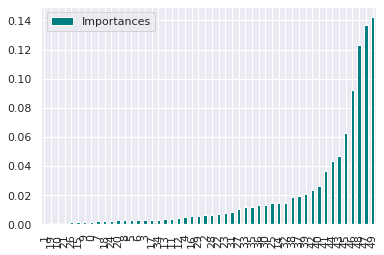

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=340)

model.fit(features, target)

importances = model.feature_importances_

final_df = pd.DataFrame({"Features": pd.DataFrame(features).columns, "Importances":importances})
final_df.set_index('Importances')

final_df = final_df.sort_values('Importances')

final_df.plot.bar(color = 'teal')

In [ ]:
frames = [features, target]

merged = pd.concat(frames, axis=1)

In [ ]:
merged.isnull().sum()


MISC_SITEID             0
F2_IADL5                0
D1_MCINON2              0
C1_TRAILB               0
STUDYID                 0
D1_MCIAPLAN             0
C1_SS_TRAILB            0
F2_IADL6                0
F1_PSMSTOTSCR           0
C1_SS_WMS3_LM_I         0
I1_INHOWCONTACT         0
PATID                   0
MISC_TARC_PAT_VISIT     0
C1_ANIMAL               0
D1_IMPNOMCI             0
F2_IADL4                0
C1_SS_WMS3_VR_I         0
X2_IDURY                0
C1_SS_COMBINED_LM_I     0
C1_CDRPER               0
C1_SS_WMS3_LM_II        0
F2_IADL1                0
C1_SS_COMBINED_LM_II    0
D1_MCIN1EX              0
C1_SS_COMBINED_VR_I     0
F2_IADL7                0
F2_IADL3                0
X2_PHYESTFIRM           0
D1_MCIAPEX              0
F2_IADL2                0
X2_PHYEST               0
C1_SS_WMS3_VR_II        0
D1_MCINON1              0
D1_MCIAMEM              0
F2_IADL8                0
F2_IADLTOTSCR           0
C1_MMSE                 0
D1_MCIAPLUS             0
C1_SS_COMBIN

In [ ]:
profile2 = ProfileReport(merged, title= 'Non-Genetic Dataset After Feature Selection', html={'style':{'full_width':True}})
profile2.to_file(output_file = 'non_genetic_df_output_feature_selection.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
merged.nunique()

MISC_SITEID                 7
F2_IADL5                    4
D1_MCINON2                  2
C1_TRAILB                 281
STUDYID                  3011
D1_MCIAPLAN                 2
C1_SS_TRAILB               18
F2_IADL6                    5
F1_PSMSTOTSCR              25
C1_SS_WMS3_LM_I            21
I1_INHOWCONTACT             3
PATID                    3670
MISC_TARC_PAT_VISIT     14655
C1_ANIMAL                  47
D1_IMPNOMCI                 2
F2_IADL4                    6
C1_SS_WMS3_VR_I            21
X2_IDURY                   20
C1_SS_COMBINED_LM_I        20
C1_CDRPER                   5
C1_SS_WMS3_LM_II           21
F2_IADL1                    6
C1_SS_COMBINED_LM_II       20
D1_MCIN1EX                  2
C1_SS_COMBINED_VR_I        20
F2_IADL7                    4
F2_IADL3                    5
X2_PHYESTFIRM              52
D1_MCIAPEX                  2
F2_IADL2                    5
X2_PHYEST                  52
C1_SS_WMS3_VR_II           19
D1_MCINON1                  2
D1_MCIAMEM

In [ ]:
merged

,MISC_SITEID,F2_IADL5,D1_MCINON2,C1_TRAILB,STUDYID,D1_MCIAPLAN,C1_SS_TRAILB,F2_IADL6,F1_PSMSTOTSCR,C1_SS_WMS3_LM_I,...,A43_ADMEDEVER,C1_CDRHOB,D1_PROBADIF,C1_CDRJU,D1_PROBAD,C1_CDRMEM,D1_DEMENTED,C1_CDRGLOB,C1_CDRSUM,P1_PT_TYPE
0,11,0,0,0,1119,0,0,0,0,-9,...,0,0.0,1,0.0,1,0.0,1,1.0,8.0,1
1,11,0,0,0,1221,0,0,0,0,-9,...,0,0.0,1,0.0,1,0.0,1,0.5,2.5,1
2,11,2,0,97,1221,0,12,4,8,-9,...,1,1.0,1,0.5,1,1.0,1,1.0,4.5,1
3,11,3,0,0,1221,0,0,4,11,-9,...,1,2.0,1,2.0,1,2.0,1,2.0,12.0,1
4,11,3,0,0,1221,0,0,4,12,-9,...,1,2.0,1,1.0,1,2.0,1,2.0,10.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14650,81,1,0,154,200231,0,8,1,6,9,...,2,0.0,0,0.0,0,0.5,0,0.5,1.0,4
14651,81,1,0,109,200232,0,8,1,6,5,...,2,0.0,0,0.5,0,0.5,0,0.5,1.0,4
14652,81,0,0,129,200233,0,10,1,6,12,...,2,0.0,0,0.0,0,0.5,0,0.5,0.5,4
14653,81,1,1,255,200234,0,2,1,6,8,...,2,0.0,0,0.5,0,1.0,0,0.5,2.0,4


In [ ]:
merged.columns.isnull().sum()

0

## SHAP Feature Importance and Permutation Importance

In [7]:
# feat_bef_sel = pd.read_csv('/content/drive/MyDrive/Capstone COMP 549/feat_bef_sel.csv')
# features = pd.read_csv('/content/drive/MyDrive/Capstone COMP 549/features.csv')

In [10]:
# feat_bef_sel = feat_bef_sel.drop('Unnamed: 0', 1)

In [41]:
from sklearn.feature_selection import mutual_info_classif
# check mutual info classification
mic = mutual_info_classif(features, target)

In [33]:
# ohe_df = features.drop(columns=num_cols, axis=1)
# ohe = pd.get_dummies(ohe_df, columns=ohe_df.columns)


Legend for Shap Class distributions
0 = AD patients
1 = control
2 = other
3 = MCI.

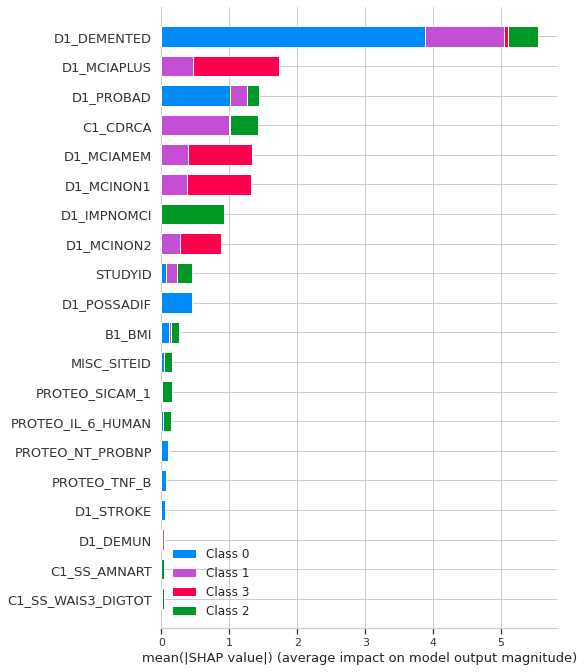

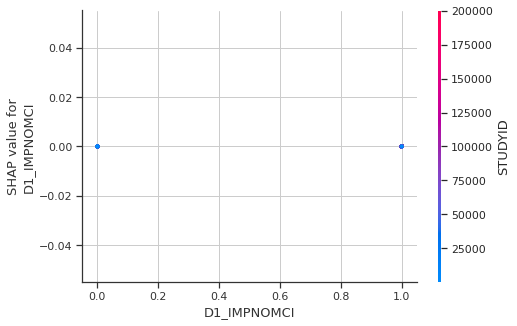

In [53]:
target = non_genetic_df['P1_PT_TYPE']
features_aft_sel = aft_sel_merged.drop('P1_PT_TYPE', 1)
xgb = XGBClassifier()
xgb = xgb.fit(features_aft_sel,target)

explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(features_aft_sel)
shap.summary_plot(shap_values, features_aft_sel)
shap.dependence_plot(13, shap_values[0], features_aft_sel)
# classifier_func = [lgbm.LGBMClassifier(), RandomForestClassifier(n_estimators = 500, random_state = 42), XGBClassifier()]


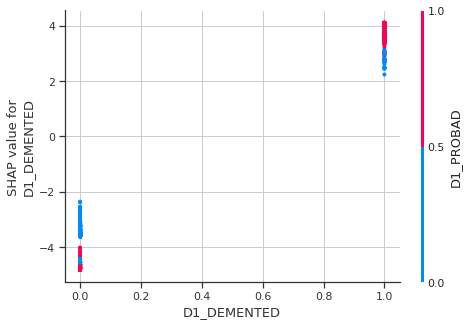

In [47]:
shap.dependence_plot('D1_DEMENTED', shap_values[0], feat_bef_sel)


Permutation Importance

Text(0.5, 1.0, 'Permutation Importances from XGBoost')

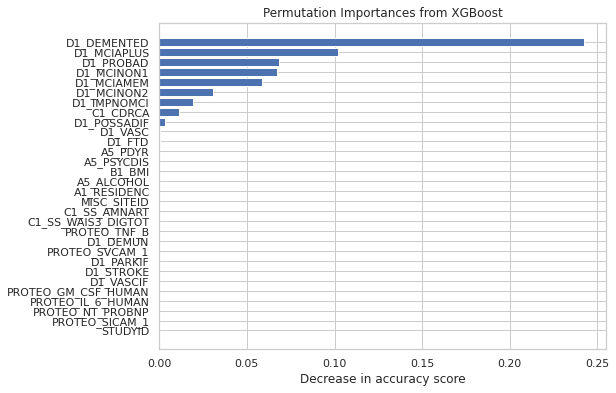

In [80]:
xgb_pi = XGBClassifier()
xgb_pi = xgb_pi.fit(X_train,y_train)
perm_importance = permutation_importance(xgb_pi, X_test, y_test)

sorted_idx = perm_importance.importances_mean.argsort()
fig, ax= plt.subplots(figsize=(8, 6))
plt.barh(aft_sel_features.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Decrease in accuracy score")
plt.title("Permutation Importances (XGBoost)")

# sorted_importances_idx = perm_importance.importances_mean.argsort()
# importances = pd.DataFrame(
#     perm_importance.importances[sorted_importances_idx].T,
#     columns=aft_sel_features.columns[sorted_importances_idx],
# )
# fig, ax = plt.subplots(figsize=(10, 6))
# ax = importances.plot.box(vert=False, whis=10)
# ax.set_title("Permutation Importances from XGBoost")
# ax.axvline(x=0, color="k", linestyle="--")
# ax.set_xlabel("Decrease in accuracy score")
# ax.figure.tight_layout()

## Modeling

In [ ]:
model_df = pd.read_csv(r'/content/drive/MyDrive/Capstone COMP 549/ aft_sel_merged.csv')

In [ ]:
model_df = model_df.drop(['Unnamed: 0'], axis=1)

In [ ]:
model_df

,STUDYID,VISIT,MISC_SITEID,A1_RESIDENC,A43_ADAF,A43_ADAPREV,B1_BMI,B1_HRATE,B1_WEIGHT,B5_DEPDSEV,...,D1_MCIN1EX,D1_MCIN2ATT,D1_MCINON1,D1_MCINON2,D1_POSSADIF,D1_PROBAD,PROTEO_NT_PROBNP,I1_INEDUC,I1_INHOWCONTACT,P1_PT_TYPE
0,1119,1,11,1,0,0,27.7,80,182,0,...,0,0,0,0,0,1,0.00,0,0,1
1,1221,1,11,1,0,0,24.0,80,127,0,...,0,0,0,0,0,1,1047.17,0,0,1
2,1221,2,11,1,2,0,21.2,79,112,0,...,0,0,0,0,0,1,1047.17,16,1,1
3,1221,3,11,1,0,1,19.6,74,104,0,...,0,0,0,0,0,1,1047.17,16,1,1
4,1221,4,11,1,0,1,19.1,60,101,0,...,0,0,0,0,0,1,1047.17,16,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14650,200231,1,81,1,0,0,32.3,67,164,0,...,0,0,0,0,0,0,0.00,14,2,4
14651,200232,1,81,1,0,0,25.9,60,146,0,...,0,0,0,0,0,0,0.00,12,2,4
14652,200233,1,81,1,0,0,32.2,61,177,1,...,1,0,1,0,0,0,0.00,9,2,4
14653,200234,1,81,1,0,0,30.6,60,158,0,...,0,0,0,1,0,0,0.00,12,2,4


In [ ]:
model_features = model_df.loc[:, model_df.columns != 'P1_PT_TYPE']
model_target = model_df.loc[:, 'P1_PT_TYPE']

In [ ]:
# standard scaling
scaler = StandardScaler()
X = scaler.fit_transform(model_features)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, model_target, test_size=0.20, random_state=42)

In [ ]:
print(X_train, X_test, y_train, y_test)

In [ ]:
def results(df, X_train,X_test, y_train, y_test, classifier_func, model_name):

    for model in range(len(classifier_func[:])):
      classifier_func[model].fit(X_train,y_train)

      print(f'EVALUATING {model_name[model]}: ')
      y_pred = classifier_func[model].predict(X_test)
      forecast_accuracy(y_test, y_pred)
      print('-'*100)
        
      non_imp_feat = ['LogRegression']
      # perform feature importance on nonlinear regressors 
      if model_name[model] not in non_imp_feat:
          
        print('-'*100)
        print()
        print('FEATURE IMPORTANCE:')
        print()
        
        columns = list(df.columns)

        # get importance
        importance = classifier_func[model].feature_importances_
        key_val = list(zip(columns[0:len(df.columns)], importance))

        # summarize feature importance
        for n, (k,v) in enumerate(key_val):
          print(f'Feature: {k}, Score: {v}')

        print()
        plt.title(f'Feature Importance for {model_name[model]}')
        plt.xlabel("Feature")
        plt.ylabel("Score")
        plt.bar(columns[0:len(df.columns)], importance)
        plt.xticks(rotation = 90)
        plt.show() 
          
        print('-'*100)  

# list of classifier functions
classifier_func = [lgbm.LGBMClassifier(), RandomForestClassifier(n_estimators = 500, random_state = 42), XGBClassifier(), CatBoostClassifier(), GradientBoostingClassifier(), DecisionTreeClassifier(random_state = 42), LogisticRegression(multi_class='multinomial')]

# list of classifier names
model_name= ['LGBM', 'Random Forest', 'XGBoost', 'CatBoost', 'GradientBoosting', 'DecisionTree', 'LogRegression']

# # evaluate, plot and feature importance for each algorithm
# results(model_df, X_train,X_test, y_train, y_test, classifier_func, model_name)

In [ ]:
model = XGBClassifier() #RandomForestClassifier(n_estimators=340)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

score = round(accuracy_score(y_test, y_pred), 4)

In [ ]:
print(f'{score*100}%')

99.83%


In [ ]:
y_pred

array([4, 1, 4, ..., 4, 1, 1])

## Modular codes not yet converted to .py files

In [6]:
def preprocessing(non_genetic_df):
  '''
  Initial preprocessing of the dataset.
  
  Input: raw non-genetic dataframe
  output: features (dataframe) and target (series) 
  '''
  no_nulls = non_genetic_df.replace(' ',np.nan,regex = True)
  df_no_nulls = no_nulls.dropna(1)
  df_no_nulls.drop(columns=['P1_PTTYPEDESC'], inplace=True)

  target = df_no_nulls["P1_PT_TYPE"]
  features = df_no_nulls.drop(columns=["P1_PT_TYPE"])
  features.drop(columns=['A1_EVENTDATEX', 'C1_DATEX'], inplace=True)

  return features, target

In [7]:
def feat_sel_p_val(features, target):
  '''
  Perform feature selection based on p-values. Used Ordinary Least Squares (OLS) model to determine p-values.
  
  Input: features (dataframe), target (series)
  output: feat_bef_sel (dataframe) ~ new features based on p-values and target (series) 
  '''

  num_cols = feat_bef_sel._get_numeric_data().columns
  num_cols = num_cols.to_list()
  ohe_df = features.drop(columns=num_cols, axis=1)
  ohe = pd.get_dummies(ohe_df, columns=ohe_df.columns)

  # Statsmodels.OLS requires us to add a constant.
  y = target
  x = sm.add_constant(features)
  model = sm.OLS(y,x)
  results = model.fit()
  print(results.summary())

  # getting OLS result and keep p-values and transposing data
  OLSresult = (results.summary2().tables[1])
  OLSresult = pd.DataFrame(OLSresult['P>|t|'])
  OLSresult.columns = ['P_VAL']
  OLSresult = OLSresult.transpose()
  columns = OLSresult.columns.to_list()

  # keeping only the features that are stationary
  for col in columns:
    if OLSresult[col]['P_VAL'] > 0.05:
      OLSresult = OLSresult.drop(col, axis=1)
  OLSresult_list = OLSresult.columns.to_list()
  
  unwanted_list = []
  for col in features.columns:
    if col not in OLSresult_list:
      unwanted_list.append(col)

  # feature selection determined by p-values
  feat_bef_sel = features.drop(unwanted_list, axis=1)

  return feat_bef_sel, target

In [8]:
def feat_sel_using_FI(feat_bef_sel, target):
  '''
  Perform feature selection based on RandomForestClassifier feature importances.
  
  Input: feat_bef_sel (dataframe) ~ new features based on p-values and target (series)  
  output: aft_sel_merged (dataframe) ~ new features based on RandomForestClassifier feature importances
  '''
  # perform RandomForestClassifier feature importances
  model = XGBClassifier()#RandomForestClassifier(n_estimators=340)

  model.fit(feat_bef_sel, target)

  importances = model.feature_importances_

  final_df = pd.DataFrame({"Features": pd.DataFrame(feat_bef_sel).columns, "Importances":importances})
  final_df.set_index('Importances')

  final_df = final_df.sort_values('Importances')

  final_df.plot.bar(color = 'teal')

  # keeping top 30 features
  final_df_rev_list = final_df.tail(30)['Features'].to_list()
  unwanted_list = []
  for col in features.columns:
    if col not in final_df_rev_list:
      unwanted_list.append(col)

  feat_aft_sel = features.drop(unwanted_list, axis=1)

  # merge the dataset for machine learning model
  frames = [feat_aft_sel, target]

  aft_sel_merged = pd.concat(frames, axis=1)

  return aft_sel_merged

In [49]:
def ml_prep(aft_sel_merged, target):

  model_features = aft_sel_merged.loc[:, aft_sel_merged.columns != 'P1_PT_TYPE']

  # standard scaling
  scaler = StandardScaler()
  X = scaler.fit_transform(model_features)

  X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.20, random_state=42)

  return X_train, X_test, y_train, y_test


In [ ]:
# for further analysis without computing evaluation
features, target = preprocessing(non_genetic_df)

feat_bef_sel, target = feat_sel_p_val(features, target)
print()
print('-'*100)
aft_sel_merged = feat_sel_using_FI(feat_bef_sel, target)
aft_sel_features = aft_sel_merged.drop('P1_PT_TYPE', 1)
X_train,X_test, y_train, y_test = ml_prep(aft_sel_features, target)

In [70]:
def results(df, X_train,X_test, y_train, y_test, classifier_func, model_name):

    for model in range(len(classifier_func[:])):
      classifier_func[model].fit(X_train,y_train)

      print(f'EVALUATING {model_name[model]}: ')
      y_pred = classifier_func[model].predict(X_test)
      forecast_accuracy(y_test, y_pred)
      print('-'*100)
        
      non_imp_feat = ['LogRegression']
      # perform feature importance on nonlinear regressors 
      if model_name[model] not in non_imp_feat:
          
        print('-'*100)
        print()
        print('FEATURE IMPORTANCE:')
        print()
        
        columns = list(df.columns)

        # get importance
        importance = classifier_func[model].feature_importances_
        key_val = list(zip(columns[0:len(df.columns)-1], importance))

        # summarize feature importance
        for n, (k,v) in enumerate(key_val):
          print(f'Feature: {k}, Score: {v}')

        print()
        plt.title(f'Feature Importance ({model_name[model]})')
        plt.xlabel("Feature")
        plt.ylabel("Score")
        plt.bar(columns[0:len(df.columns)-1], importance)
        plt.xticks(rotation = 90)
        plt.show() 
          
        print('-'*100)  

In [72]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):

    score = round(accuracy_score(actual, forecast), 4)
    print(f'{score*100}%')
    
#  INCLUDE EVALUATION METRICS HERE

In [74]:
def main(non_genetic_df):
  features, target = preprocessing(non_genetic_df)

  feat_bef_sel, target = feat_sel_p_val(features, target)
  print()
  print('-'*100)
  aft_sel_merged = feat_sel_using_FI(feat_bef_sel, target)

  features_aft_sel = aft_sel_merged.loc[:, aft_sel_merged.columns != 'P1_PT_TYPE']

  X_train,X_test, y_train, y_test = ml_prep(features_aft_sel, target)

  # list of classifier functions
  classifier_func = [lgbm.LGBMClassifier(), RandomForestClassifier(n_estimators = 500, random_state = 42), XGBClassifier(), CatBoostClassifier(), GradientBoostingClassifier(), DecisionTreeClassifier(random_state = 42), LogisticRegression(multi_class='multinomial')]

  # list of classifier names
  model_name= ['LGBM', 'Random Forest', 'XGBoost', 'CatBoost', 'GradientBoosting', 'DecisionTree', 'LogRegression']

  # evaluate performance and feature importance for each algorithm
  results(aft_sel_merged, X_train,X_test, y_train, y_test, classifier_func, model_name)

                            OLS Regression Results                            
Dep. Variable:             P1_PT_TYPE   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     5028.
Date:                Wed, 19 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:29:36   Log-Likelihood:                 14855.
No. Observations:               14655   AIC:                        -2.891e+04
Df Residuals:                   14257   BIC:                        -2.589e+04
Df Model:                         397                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

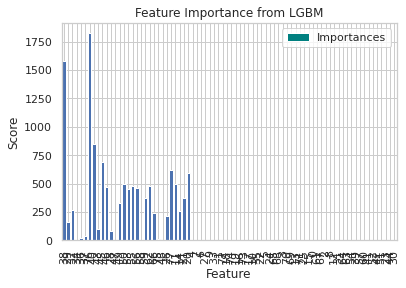

----------------------------------------------------------------------------------------------------
EVALUATING Random Forest: 
99.72999999999999%
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------

FEATURE IMPORTANCE:

Feature: STUDYID, Score: 0.025921067669045512
Feature: MISC_SITEID, Score: 0.030706680749468113
Feature: A1_RESIDENC, Score: 0.004146659853706338
Feature: A5_ALCOHOL, Score: 0.0009588596418556836
Feature: A5_PDYR, Score: 0.00041056555447864957
Feature: A5_PSYCDIS, Score: 0.0014487724373923913
Feature: B1_BMI, Score: 0.006212318896127617
Feature: C1_CDRCA, Score: 0.14263128090420696
Feature: C1_SS_AMNART, Score: 0.003007848886110861
Feature: C1_SS_WAIS3_DIGTOT, Score: 0.010926136222136543
Feature: D1_DEMENTED, Score: 0.25143324239871034
Feature: D1_DEMUN, Score: 0.006507176787379711
Feature: D1_FTD, Score: 0.00071200974126

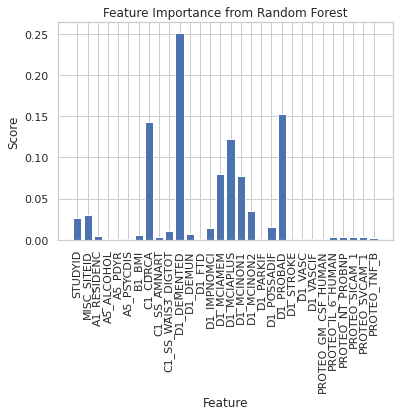

----------------------------------------------------------------------------------------------------
EVALUATING XGBoost: 
99.83%
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------

FEATURE IMPORTANCE:

Feature: STUDYID, Score: 0.0012241427320986986
Feature: MISC_SITEID, Score: 0.005348609760403633
Feature: A1_RESIDENC, Score: 0.001180445309728384
Feature: A5_ALCOHOL, Score: 0.0
Feature: A5_PDYR, Score: 0.006000136025249958
Feature: A5_PSYCDIS, Score: 0.0012006612960249186
Feature: B1_BMI, Score: 0.0004986159619875252
Feature: C1_CDRCA, Score: 0.10736093670129776
Feature: C1_SS_AMNART, Score: 0.0007588203880004585
Feature: C1_SS_WAIS3_DIGTOT, Score: 0.000609466340392828
Feature: D1_DEMENTED, Score: 0.31700628995895386
Feature: D1_DEMUN, Score: 0.006028879899531603
Feature: D1_FTD, Score: 0.007837655022740364
Feature: D1_IMPNOMCI, Score: 0

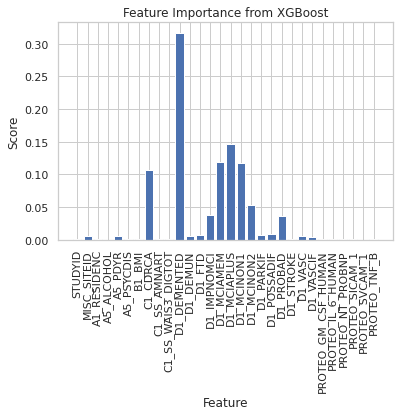

----------------------------------------------------------------------------------------------------
Learning rate set to 0.089711
0:	learn: 1.1402206	total: 84.2ms	remaining: 1m 24s
1:	learn: 0.9665011	total: 97.4ms	remaining: 48.6s
2:	learn: 0.8296867	total: 110ms	remaining: 36.6s
3:	learn: 0.7249671	total: 122ms	remaining: 30.5s
4:	learn: 0.6358982	total: 135ms	remaining: 26.8s
5:	learn: 0.5631792	total: 147ms	remaining: 24.4s
6:	learn: 0.5027030	total: 160ms	remaining: 22.7s
7:	learn: 0.4485340	total: 173ms	remaining: 21.4s
8:	learn: 0.4018468	total: 190ms	remaining: 21s
9:	learn: 0.3612768	total: 203ms	remaining: 20.1s
10:	learn: 0.3257899	total: 216ms	remaining: 19.4s
11:	learn: 0.2945813	total: 228ms	remaining: 18.8s
12:	learn: 0.2670115	total: 241ms	remaining: 18.3s
13:	learn: 0.2425639	total: 256ms	remaining: 18s
14:	learn: 0.2208148	total: 269ms	remaining: 17.7s
15:	learn: 0.2022573	total: 282ms	remaining: 17.3s
16:	learn: 0.1856409	total: 295ms	remaining: 17s
17:	learn: 0.17

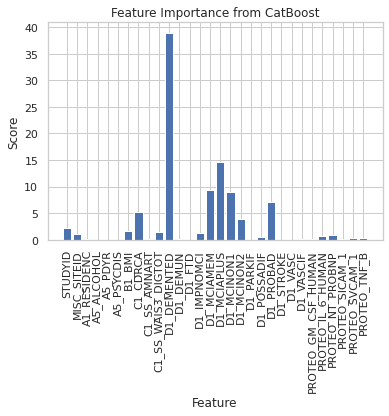

----------------------------------------------------------------------------------------------------
EVALUATING GradientBoosting: 
99.76%
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------

FEATURE IMPORTANCE:

Feature: STUDYID, Score: 0.00011455138419238175
Feature: MISC_SITEID, Score: 8.399477224212852e-05
Feature: A1_RESIDENC, Score: 6.898906676795563e-05
Feature: A5_ALCOHOL, Score: 8.308401810953348e-05
Feature: A5_PDYR, Score: 0.00014172005115840964
Feature: A5_PSYCDIS, Score: 6.244741255814519e-05
Feature: B1_BMI, Score: 0.0002467626652300355
Feature: C1_CDRCA, Score: 0.10202280288647494
Feature: C1_SS_AMNART, Score: 0.0
Feature: C1_SS_WAIS3_DIGTOT, Score: 9.001649667169088e-05
Feature: D1_DEMENTED, Score: 0.44627077088008443
Feature: D1_DEMUN, Score: 0.0012507776119152346
Feature: D1_FTD, Score: 0.00021857523308223392
Feature: D1_

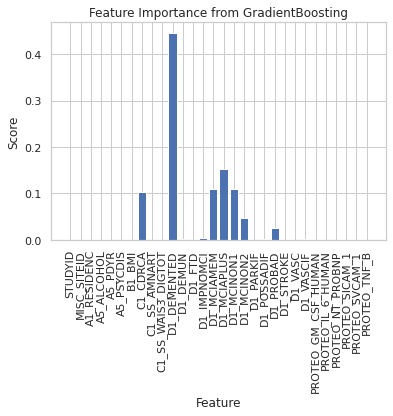

----------------------------------------------------------------------------------------------------
EVALUATING DecisionTree: 
99.72999999999999%
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------

FEATURE IMPORTANCE:

Feature: STUDYID, Score: 0.000776364766037827
Feature: MISC_SITEID, Score: 0.0
Feature: A1_RESIDENC, Score: 0.0
Feature: A5_ALCOHOL, Score: 0.0
Feature: A5_PDYR, Score: 0.000855280434300592
Feature: A5_PSYCDIS, Score: 0.0
Feature: B1_BMI, Score: 0.0003556040535913245
Feature: C1_CDRCA, Score: 0.0005724327856948774
Feature: C1_SS_AMNART, Score: 0.0
Feature: C1_SS_WAIS3_DIGTOT, Score: 0.00012235174148261734
Feature: D1_DEMENTED, Score: 0.5484541722919131
Feature: D1_DEMUN, Score: 0.001617627572120784
Feature: D1_FTD, Score: 0.0013710952856148552
Feature: D1_IMPNOMCI, Score: 0.023273086020591627
Feature: D1_MCIAMEM, Score: 0.

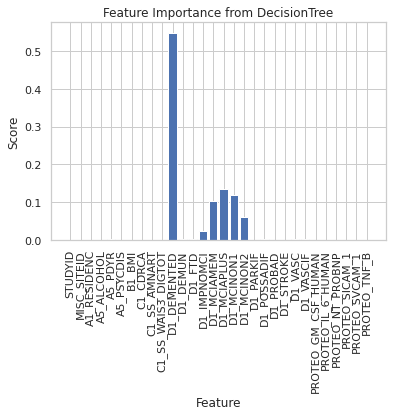

----------------------------------------------------------------------------------------------------
EVALUATING LogRegression: 
99.83%
----------------------------------------------------------------------------------------------------


In [78]:
# Access raw data; change path
non_genetic_df = pd.read_csv("/content/drive/MyDrive/Capstone COMP 549/Copy of 20220916 updated TARCC Data for Dr Broussard.csv")
main(non_genetic_df)

In [ ]:
# def feature_importance_SHAP(feat_bef_sel, target):
#   '''
#   Perform feature selection based on SHAP on various models.
  
#   Input: feat_bef_sel (dataframe) ~ new features based on p-values and target (series)  
#   output: aft_sel_merged (dataframe) ~ new features based on RandomForestClassifier feature importances
#   '''

# xgb = XGBClassifier()
# xgb = xgb.fit(X_train,y_train)

# explainer = shap.TreeExplainer(xgb)
# shap_values = explainer.shap_values(X_test)
# feature_names = feat_bef_sel.columns
# shap.summary_plot(shap_values, X_test)
# shap.dependence_plot(13, shap_values[0], X_test)



## Evaluating Top k Features


In [ ]:
aft_sel_merged = pd.read_csv('/content/drive/MyDrive/Capstone COMP 549/ aft_sel_merged.csv')

In [ ]:
# evaluating top 10 features
xgb = lgbm.LGBMClassifier()
xgb = xgb.fit(X_train,y_train)

# dt = DecisionTreeClassifier()
# dt = dt.fit(X_train,y_train)
importances = xgb.feature_importances_

final_df = pd.DataFrame({"Features": pd.DataFrame(feat_bef_sel).columns, "Importances":importances})
final_df.set_index('Importances')

final_df = final_df.sort_values('Importances')

Random Forest

['PROTEO_NT_PROBNP',
 'B1_BPDIAS',
 'B1_HRATE',
 'B5_DEPDSEV',
 'B1_WEIGHT',
 'VISIT',
 'D1_DEMUNIF',
 'B1_BMI',
 'D1_DEMUN',
 'D1_MCIAPVIS',
 'I1_INEDUC',
 'C1_SS_WAIS3_DIGTOT',
 'D1_MCIN2ATT',
 'D1_IMPNOMCI',
 'D1_POSSADIF',
 'C1_BOSTON60',
 'STUDYID',
 'MISC_SITEID',
 'A43_ADAF',
 'D1_MCINON2',
 'D1_MCIN1EX',
 'I1_INHOWCONTACT',
 'A43_ADAPREV',
 'D1_MCIAPEX',
 'D1_MCINON1',
 'D1_MCIAMEM',
 'D1_MCIAPLUS',
 'C1_CDRCA',
 'D1_PROBAD',
 'D1_DEMENTED']

Decision Tree

['C1_SS_WAIS3_DIGTOT',
 'C1_SS_WAISR_DIGTOT',
 'C1_SS_WMSR_DIGTOT',
 'D1_COGOTH',
 'VISIT',
 'D1_PROBAD',
 'A43_ADAF',
 'D1_PPAPHIF',
 'PROTEO_SVCAM_1',
 'A1_RESIDENC',
 'STUDYID',
 'A5_INCONTU',
 'B1_BMI',
 'B1_HRATE',
 'PROTEO_IL_6_HUMAN',
 'PROTEO_SICAM_1',
 'D1_PARKIF',
 'C1_CDRCA',
 'D1_VASCIF',
 'A5_PDYR',
 'D1_FTD',
 'D1_VASC',
 'D1_POSSADIF',
 'D1_DEMUNIF',
 'D1_IMPNOMCI',
 'D1_MCINON2',
 'D1_MCIAMEM',
 'D1_MCINON1',
 'D1_MCIAPLUS',
 'D1_DEMENTED']

XGBoost

['PROTEO_TNF_B',
 'C1_SS_WAIS3_DIGTOT',
 'D1_DLB',
 'A5_NCOTHR',
 'A5_PSYCDIS',
 'STUDYID',
 'A43_ADAF',
 'D1_STROKE',
 'PROTEO_SICAM_1',
 'PROTEO_NT_PROBNP',
 'C1_BOSTON60',
 'PROTEO_IL_6_HUMAN',
 'A1_RESIDENC',
 'PROTEO_GM_CSF_HUMAN',
 'D1_VASCIF',
 'D1_VASC',
 'MISC_SITEID',
 'A5_PDYR',
 'D1_DEMUN',
 'D1_PARKIF',
 'D1_FTD',
 'D1_POSSADIF',
 'D1_IMPNOMCI',
 'D1_PROBAD',
 'D1_MCINON2',
 'D1_MCIAMEM',
 'D1_MCINON1',
 'C1_CDRCA',
 'D1_MCIAPLUS',
 'D1_DEMENTED']

In [ ]:
final_df.tail(30)['Features'].to_list()

['C1_SS_AMNART',
 'A1_RESIDENC',
 'I1_INEDUC',
 'MISC_SITEID',
 'PROTEO_SICAM_1',
 'C1_SS_WMSR_DIGTOT',
 'I1_INHOWCONTACT',
 'PROTEO_NT_PROBNP',
 'PROTEO_SVCAM_1',
 'PROTEO_IL_6_HUMAN',
 'B1_BPDIAS',
 'D1_STROKE',
 'PROTEO_GM_CSF_HUMAN',
 'D1_IMPNOMCI',
 'C1_SS_WAIS3_DIGTOT',
 'B1_HRATE',
 'B1_BMI',
 'D1_MCINON2',
 'D1_POSSADIF',
 'PROTEO_TNF_B',
 'D1_MCIAPLUS',
 'D1_MCINON1',
 'D1_MCIAMEM',
 'D1_DEMENTED',
 'D1_PROBAD',
 'B1_WEIGHT',
 'C1_BOSTON60',
 'VISIT',
 'C1_CDRCA',
 'STUDYID']

top features that have high corr with target based on pandas profiling

['D1_DEMUN','A43_ADAPREV', 'C1_CDRCA', 'D1_DEMENTED', 'D1_IMPNOMCI', 'D1_MCIAMEM', 'D1_PROBAD', 'D1_MCINON1', 'D1_MCIN1EX', 'D1_MCIAPLUS', 'D1_MCIAPEX']


## Misc Analysis

In [ ]:
df_no_nulls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14655 entries, 0 to 14654
Columns: 437 entries, STUDYID to P1_WHYNOTALL
dtypes: datetime64[ns](2), float64(76), int64(359)
memory usage: 48.9 MB


In [ ]:
# df_no_nulls['A1_EVENTDATEX']
for date in df_no_nulls['A1_EVENTDATEX']:
  date_object = datetime.strptime(date, '%m/%d/%Y').date()
  df_no_nulls['A1_EVENTDATEX'] = date_object
type(date_object)

TypeError: ignored

In [ ]:
df_no_nulls.select_dtypes('object')

,A1_EVENTDATEX,C1_DATEX,P1_PTTYPEDESC
0,2007-08-21,7/6/2007,AD
1,2007-08-21,3/30/2007,AD
2,2007-08-21,5/6/2008,AD
3,2007-08-21,9/16/2009,AD
4,2007-08-21,9/23/2010,AD
...,...,...,...
14650,2007-08-21,3/21/2017,MCI
14651,2007-08-21,2/17/2017,MCI
14652,2007-08-21,4/4/2017,MCI
14653,2007-08-21,6/22/2017,MCI


In [ ]:
type(df_no_nulls['A1_EVENTDATEX'][0])

datetime.date

In [ ]:
pd.to_datetime(df_no_nulls[['A1_EVENTDATEX', 'C1_DATEX']], format='%d%m%Y')

ValueError: ignored

In [ ]:
df_no_nulls.to_datetime(df_no_nulls.loc['A1_EVENTDATEX', 'C1_DATEX'])

AttributeError: ignored

In [ ]:
if no_nulls['CCR_YES'][0] == ' ':
  print('-----')
  print(True)

In [ ]:
target = non_genetic_df[["STUDYID", "P1_PT_TYPE"]]

In [ ]:
# AD_target = non_genetic_df[["P1_PT_TYPE" == '1']]
AD_target = non_genetic_df.loc[non_genetic_df['P1_PT_TYPE'] == 1]

In [ ]:
AD_target

,STUDYID,PATID,VISIT,MISC_TARC_PAT_VISIT,CCR,CCR_YES,CCR_CL_IMPRESS_CODE,CCR_MCIAMEM,CCR_MCIAPLUS,CCR_MCIAPLAN,...,P1_PTTYPEDESC,P1_SERUM,P1_SHARE_AGREE,P1_SHARE_DATEX,P1_TIMEDRAWX,P1_TIMEFOODX,P1_TIMESTICKX,P1_WHOLEBLOOD,P1_WHYNOTALL,P1_WHYNOTALLX
0,1119,11001119,1,1100111901,0,,,,,,...,AD,0,0,,,,,1,0,
1,1221,11001221,1,1100122101,0,,,,,,...,AD,1,0,,,,,1,0,
2,1221,11001221,2,1100122102,0,,,,,,...,AD,1,0,,16:50:00,,,1,0,
3,1221,11001221,3,1100122103,0,,,,,,...,AD,0,0,,,,,0,0,
4,1221,11001221,4,1100122104,0,,,,,,...,AD,0,0,,,,,0,0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14616,200206,81200206,2,8120020602,1,,4,,,,...,AD,1,1,2/14/2017,11:51:00,10:30:00,,1,0,
14618,200207,81200207,2,8120020702,1,,4,,,,...,AD,1,1,1/3/2017,9:20:00,7:00:00,,1,0,
14621,200209,81200209,1,8120020901,1,1,5,0,1,0,...,AD,1,1,1/5/2016,10:47:00,6:00:00,,1,0,
14634,200216,81200216,1,8120021601,1,,4,,,,...,AD,1,1,7/5/2016,9:38:00,7:30:00,,1,0,


In [ ]:
t = non_genetic_df[["STUDYID",'P1_PTTYPEDESC']]

In [ ]:
t

,STUDYID,P1_PTTYPEDESC
0,1119,AD
1,1221,AD
2,1221,AD
3,1221,AD
4,1221,AD
...,...,...
14650,200231,MCI
14651,200232,MCI
14652,200233,MCI
14653,200234,MCI


In [ ]:
target.head(50)

,STUDYID,P1_PT_TYPE
0,1119,1
1,1221,1
2,1221,1
3,1221,1
4,1221,1
5,1221,1
6,1221,1
7,1226,1
8,1300,1
9,1300,1


In [ ]:
list(non_genetic_df.columns) 

['STUDYID',
 'PATID',
 'VISIT',
 'MISC_TARC_PAT_VISIT',
 'CCR',
 'CCR_YES',
 'CCR_CL_IMPRESS_CODE',
 'CCR_MCIAMEM',
 'CCR_MCIAPLUS',
 'CCR_MCIAPLAN',
 'CCR_MCIAPATT',
 'CCR_MCIAPEX',
 'CCR_MCIAPVIS',
 'CCR_MCINON1',
 'CCR_MCIN1LAN',
 'CCR_MCIN1ATT',
 'CCR_MCIN1EX',
 'CCR_MCIN1VIS',
 'CCR_MCINON2',
 'CCR_MCIN2LAN',
 'CCR_MCIN2ATT',
 'CCR_MCIN2EX',
 'CCR_MCIN2VIS',
 'CCR_YES_NOTES',
 'MISC_SITEID',
 'A1_BIRTHYR',
 'AGE',
 'A1_EVENTDATEX',
 'A1_HANDEDNESS',
 'A1_HISPANIC',
 'A1_HISPANIC_TYPE',
 'A1_HISPORX',
 'A1_MARISTAT',
 'A1_RACE',
 'A1_RACESEC',
 'A1_RESIDENC',
 'A1_SEX',
 'A3_DADDEM',
 'A3_MOMDEM',
 'A41_PMA',
 'A41_PMAF',
 'A41_PMAFU',
 'A41_PMAP',
 'A41_PMAPF',
 'A41_PMAPFU',
 'A41_PMAPREV',
 'A41_PMART',
 'A41_PMAS',
 'A41_PMASTDA',
 'A41_PMASTMO',
 'A41_PMASTYR',
 'A41_PMASU',
 'A41_PMB',
 'A41_PMBF',
 'A41_PMBFU',
 'A41_PMBP',
 'A41_PMBPF',
 'A41_PMBPFU',
 'A41_PMBPREV',
 'A41_PMBRT',
 'A41_PMBS',
 'A41_PMBSTDA',
 'A41_PMBSTMO',
 'A41_PMBSTYR',
 'A41_PMBSU',
 'A42_VEA',
 'A42_V

In [ ]:
non_genetic_df.shape 

(14655, 787)

In [ ]:
non_genetic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14655 entries, 0 to 14654
Columns: 787 entries, STUDYID to P1_WHYNOTALLX
dtypes: float64(76), int64(359), object(352)
memory usage: 88.0+ MB


In [ ]:
non_genetic_df.describe()

,STUDYID,PATID,VISIT,MISC_TARC_PAT_VISIT,CCR,MISC_SITEID,A1_BIRTHYR,AGE,A1_HANDEDNESS,A1_HISPANIC,...,I1_ISNEWINFORM,P1_BIOSERUM,P1_BUFFY,P1_CSF,P1_HRSAFTFOOT,P1_PLASMA,P1_SERUM,P1_SHARE_AGREE,P1_WHOLEBLOOD,P1_WHYNOTALL
count,14655.000000,1.465500e+04,14655.000000,1.465500e+04,14655.000000,14655.000000,14655.000000,14655.000000,14655.00000,14655.000000,...,14655.000000,14655.000000,14655.000000,14655.000000,14655.000000,14655.000000,14655.000000,14655.000000,14655.000000,14655.000000
mean,44054.457864,4.647237e+07,3.380075,4.647237e+09,0.196588,46.428318,1940.408120,72.404640,1.95667,0.349778,...,0.238758,0.013920,0.886182,0.003275,1.736677,0.886114,0.903855,0.370590,0.923780,0.075333
std,85478.261933,2.438795e+07,2.275650,2.438795e+09,0.397432,24.370237,9.984402,9.334928,0.28129,0.502012,...,0.426339,0.117164,0.317601,0.057139,3.412827,0.317684,0.294800,0.482979,0.265358,0.384711
min,1.000000,1.100112e+07,1.000000,1.100112e+09,0.000000,11.000000,1905.000000,50.000000,1.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,470.000000,2.507005e+07,1.000000,2.507005e+09,0.000000,25.000000,1933.000000,65.000000,2.00000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
50%,2766.000000,5.100278e+07,3.000000,5.100278e+09,0.000000,51.000000,1940.000000,73.000000,2.00000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
75%,100039.000000,6.100037e+07,5.000000,6.100037e+09,0.000000,61.000000,1948.000000,79.000000,2.00000,1.000000,...,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,990137.000000,8.120024e+07,13.000000,8.120024e+09,1.000000,81.000000,1967.000000,105.000000,9.00000,9.000000,...,1.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
non_genetic_df.columns[non_genetic_df.isnull().any()]

Index([], dtype='object')

In [ ]:
 non_genetic_df = non_genetic_df.dropna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
non_genetic_df['P1_PT_TYPE']

0        1
1        1
2        1
3        1
4        1
        ..
14650    4
14651    4
14652    4
14653    4
14654    4
Name: P1_PT_TYPE, Length: 14655, dtype: int64

In [ ]:
non_genetic_df.shape

(14655, 787)

In [ ]:
non_genetic_df.isnull().sum() 

STUDYID                0
PATID                  0
VISIT                  0
MISC_TARC_PAT_VISIT    0
CCR                    0
                      ..
P1_TIMEFOODX           0
P1_TIMESTICKX          0
P1_WHOLEBLOOD          0
P1_WHYNOTALL           0
P1_WHYNOTALLX          0
Length: 787, dtype: int64

In [ ]:
non_genetic_df.columns.isnull().sum()

In [ ]:
non_genetic_df.duplicated().sum() 

In [ ]:
non_genetic_df[non_genetic_df.isnull().any(axis=1)]

In [ ]:
replaced_null_df = non_genetic_df.replace(' ',np.nan,inplace = False)

In [ ]:
# Checking how many rows have null values 
replaced_null_df = replaced_null_df.isna().sum()[replaced_null_df.isna().sum() > 0]

In [ ]:
replaced_null_df["P1_PT_TYPE"]

In [ ]:
profile1 = ProfileReport(non_genetic_df, title= 'Non-Genetic Dataset', html={'style':{'full_width':True}})
profile1.to_file(output_file = 'non_genetic_df_output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: ignored